## Still more exercises for practice

<br>

##  Exercise 1 <a id="11"></a>

### 1. Line plots <a id="0"></a>

#### Data prepping

Let us analyse the `Canadian Immigration` dataset. We will be importing the dataset using pandas read_excel() method from module `xlrd`.

In [20]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
import matplotlib as mpl  # plotting library
import matplotlib.pyplot as plt  # plotting library

In [2]:
import sys
!{sys.executable} -m pip install xlrd

#!conda install -c anaconda xlrd --yes

In [21]:
# optional: apply a style to Matplotlib

print(plt.style.available)
mpl.style.use(['ggplot']) # optional: for ggplot-like style

['grayscale', '_classic_test', 'fast', 'seaborn-deep', 'seaborn-dark', 'seaborn-ticks', 'seaborn-darkgrid', 'seaborn-white', 'seaborn-bright', 'seaborn-paper', 'seaborn-muted', 'seaborn-dark-palette', 'dark_background', 'Solarize_Light2', 'bmh', 'seaborn-poster', 'seaborn-whitegrid', 'ggplot', 'seaborn-notebook', 'seaborn-talk', 'seaborn', 'classic', 'fivethirtyeight', 'seaborn-pastel', 'seaborn-colorblind']


In [31]:
df_can = pd.read_excel('Canada1.xlsx',
                       sheet_name=0,
                       skiprows=0,
                       skipfooter=2
                      )

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [32]:
df_can.head()

Type    Coverage          OdName  AREA AreaName   REG  \
0  Immigrants  Foreigners     Afghanistan   935     Asia  5501   
1  Immigrants  Foreigners         Albania   908   Europe   925   
2  Immigrants  Foreigners         Algeria   903   Africa   912   
3  Immigrants  Foreigners  American Samoa   909  Oceania   957   
4  Immigrants  Foreigners         Andorra   908   Europe   925   

           RegName  DEV             DevName  1980  ...   2004  2005  2006  \
0    Southern Asia  902  Developing regions    16  ...   2978  3436  3009   
1  Southern Europe  901   Developed regions     1  ...   1450  1223   856   
2  Northern Africa  902  Developing regions    80  ...   3616  3626  4807   
3        Polynesia  902  Developing regions     0  ...      0     0     1   
4  Southern Europe  901   Developed regions     0  ...      0     0     1   

   2007  2008  2009  2010  2011  2012  2013  
0  2652  2111  1746  1758  2203  2635  2004  
1   702   560   716   561   539   620   603  
2  3623  4005  5393  4752  4325  3774  4331  
3     0     0     0     0     0     0     0  
4     1     0     0     0     0     1     1  

[5 rows x 43 columns]

In [33]:
#To get the list of column headers we can call upon the dataframe's .columns parameter.

df_can.columns.values 

array(['Type', 'Coverage', 'OdName', 'AREA', 'AreaName', 'REG', 'RegName',
       'DEV', 'DevName', 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013], dtype=object)

In [34]:
#Similarly, to get the list of indicies we use the .index parameter.

df_can.index.values

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [35]:
#To get the index and columns as lists, we can use the tolist() method.


df_can.columns.tolist()
df_can.index.tolist()

print (type(df_can.columns.tolist()))
print (type(df_can.index.tolist()))

<class 'list'>
<class 'list'>


In [36]:
# clean up the dataset to remove unnecessary columns (eg. REG) 
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

# let's rename the columns so that they make sense
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# for sake of consistency, let's also make all column labels of type string
df_can.columns = list(map(str, df_can.columns))

# set the country name as index - useful for quickly looking up countries using .loc method
df_can.set_index('Country', inplace=True)

# add total column
df_can['Total'] = df_can.sum(axis=1)

# years that we will be using in this lesson - useful for plotting later on
years = list(map(str, range(1980, 2014)))
print('data dimensions:', df_can.shape)

data dimensions: (195, 38)


In [37]:
# let's check the column labels types now
all(isinstance(column, str) for column in df_can.columns)

True

In [38]:
df_can.describe()

1980          1981          1982          1983          1984  \
count    195.000000    195.000000    195.000000    195.000000    195.000000   
mean     508.394872    566.989744    534.723077    387.435897    376.497436   
std     1949.588546   2152.643752   1866.997511   1204.333597   1198.246371   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%       13.000000     10.000000     11.000000     12.000000     13.000000   
75%      251.500000    295.500000    275.000000    173.000000    181.000000   
max    22045.000000  24796.000000  20620.000000  10015.000000  10170.000000   

              1985         1986          1987          1988          1989  \
count   195.000000   195.000000    195.000000    195.000000    195.000000   
mean    358.861538   441.271795    691.133333    714.389744    843.241026   
std    1079.309600  1225.576630   2109.205607   2443.606788   2555.048874   
min       0.000000     0.000000      0.000000      0.000000      0.000000   
25%       0.000000     0.500000      0.500000      1.000000      1.000000   
50%      17.000000    18.000000     26.000000     34.000000     44.000000   
75%     197.000000   254.000000    434.000000    409.000000    508.500000   
max    9564.000000  9470.000000  21337.000000  27359.000000  23795.000000   

           ...                2005          2006          2007          2008  \
count      ...          195.000000    195.000000    195.000000    195.000000   
mean       ...         1320.292308   1266.958974   1191.820513   1246.394872   
std        ...         4425.957828   3926.717747   3443.542409   3694.573544   
min        ...            0.000000      0.000000      0.000000      0.000000   
25%        ...           28.500000     25.000000     31.000000     31.000000   
50%        ...          210.000000    218.000000    198.000000    205.000000   
75%        ...          832.000000    842.000000    899.000000    934.500000   
max        ...        42584.000000  33848.000000  28742.000000  30037.000000   

               2009          2010          2011          2012          2013  \
count    195.000000    195.000000    195.000000    195.000000    195.000000   
mean    1275.733333   1420.287179   1262.533333   1313.958974   1320.702564   
std     3829.630424   4462.946328   4030.084313   4247.555161   4237.951988   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       36.000000     40.500000     37.500000     42.500000     45.000000   
50%      214.000000    211.000000    179.000000    233.000000    213.000000   
75%      888.000000    932.000000    772.000000    783.000000    796.000000   
max    29622.000000  38617.000000  36765.000000  34315.000000  34129.000000   

               Total  
count     195.000000  
mean    32867.451282  
std     91785.498686  
min         1.000000  
25%       952.000000  
50%      5018.000000  
75%     22239.500000  
max    691904.000000  

[8 rows x 35 columns]

### Line Pots (Series/Dataframe)

In [44]:
df_can.head()

Continent           Region             DevName  1980  1981  \
Country                                                                     
Afghanistan         Asia    Southern Asia  Developing regions    16    39   
Albania           Europe  Southern Europe   Developed regions     1     0   
Algeria           Africa  Northern Africa  Developing regions    80    67   
American Samoa   Oceania        Polynesia  Developing regions     0     1   
Andorra           Europe  Southern Europe   Developed regions     0     0   

                1982  1983  1984  1985  1986  ...    2005  2006  2007  2008  \
Country                                       ...                             
Afghanistan       39    47    71   340   496  ...    3436  3009  2652  2111   
Albania            0     0     0     0     1  ...    1223   856   702   560   
Algeria           71    69    63    44    69  ...    3626  4807  3623  4005   
American Samoa     0     0     0     0     0  ...       0     1     0     0   
Andorra            0     0     0     0     2  ...       0     1     1     0   

                2009  2010  2011  2012  2013  Total  
Country                                              
Afghanistan     1746  1758  2203  2635  2004  58639  
Albania          716   561   539   620   603  15699  
Algeria         5393  4752  4325  3774  4331  69439  
American Samoa     0     0     0     0     0      6  
Andorra            0     0     0     1     1     15  

[5 rows x 38 columns]

In [39]:
haiti = df_can.loc['Haiti', years] # passing in years 1980 - 2013 to exclude the 'total' column
haiti.head()

1980    1666
1981    3692
1982    3498
1983    2860
1984    1418
Name: Haiti, dtype: object

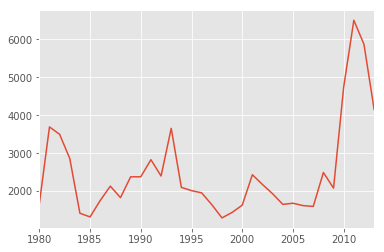

In [40]:
haiti.plot()

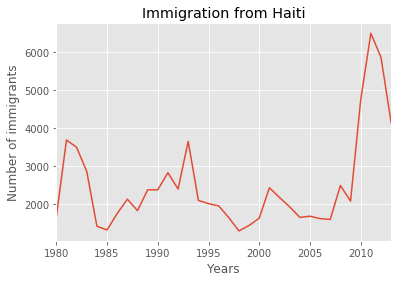

In [41]:
haiti.index = haiti.index.map(int) # let's change the index values of Haiti to type integer for plotting
haiti.plot(kind='line')

plt.title('Immigration from Haiti')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')

plt.show() # need this line to show the updates made to the figure

# We can clearly notice how number of immigrants from Haiti spiked up from 2010 as Canada stepped up its efforts 
#to accept refugees from Haiti. Let's annotate this spike in the plot by using the plt.text() method.

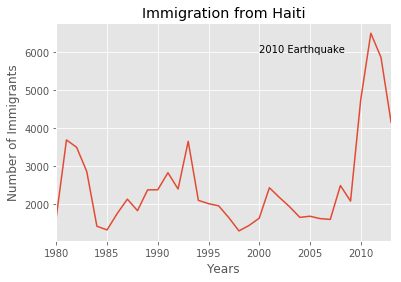

In [42]:
haiti.plot(kind='line')

plt.title('Immigration from Haiti')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

# annotate the 2010 Earthquake. 
# syntax: plt.text(x, y, label)
plt.text(2000, 6000, '2010 Earthquake') # see note below

plt.show() 

### 2.  Area plots <a id="2"></a>

In [45]:
#df_can.set_index('Country', inplace=True)

# let's view the first five elements and see how the dataframe was changed
df_can.head()

Continent           Region             DevName  1980  1981  \
Country                                                                     
Afghanistan         Asia    Southern Asia  Developing regions    16    39   
Albania           Europe  Southern Europe   Developed regions     1     0   
Algeria           Africa  Northern Africa  Developing regions    80    67   
American Samoa   Oceania        Polynesia  Developing regions     0     1   
Andorra           Europe  Southern Europe   Developed regions     0     0   

                1982  1983  1984  1985  1986  ...    2005  2006  2007  2008  \
Country                                       ...                             
Afghanistan       39    47    71   340   496  ...    3436  3009  2652  2111   
Albania            0     0     0     0     1  ...    1223   856   702   560   
Algeria           71    69    63    44    69  ...    3626  4807  3623  4005   
American Samoa     0     0     0     0     0  ...       0     1     0     0   
Andorra            0     0     0     0     2  ...       0     1     1     0   

                2009  2010  2011  2012  2013  Total  
Country                                              
Afghanistan     1746  1758  2203  2635  2004  58639  
Albania          716   561   539   620   603  15699  
Algeria         5393  4752  4325  3774  4331  69439  
American Samoa     0     0     0     0     0      6  
Andorra            0     0     0     1     1     15  

[5 rows x 38 columns]

In [46]:
# finally, let's create a list of years from 1980 - 2013
# this will come in handy when we start plotting the data
years = list(map(str, range(1980, 2014)))

years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

In [47]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  2.1.1


In [48]:
df_can.sort_values(['Total'], ascending=False, axis=0, inplace=True)

# get the top 5 entries
df_top5 = df_can.head()

# transpose the dataframe
df_top5 = df_top5[years].transpose() 

df_top5.head()

Country  India  China  United Kingdom of Great Britain and Northern Ireland  \
1980      8880   5123                                              22045      
1981      8670   6682                                              24796      
1982      8147   3308                                              20620      
1983      7338   1863                                              10015      
1984      5704   1527                                              10170      

Country  Philippines  Pakistan  
1980            6051       978  
1981            5921       972  
1982            5249      1201  
1983            4562       900  
1984            3801       668

Area plots are stacked by default. And to produce a stacked area plot, each column must be either all positive or all negative values (any NaN values will defaulted to 0). To produce an unstacked plot, pass `stacked=False`. 

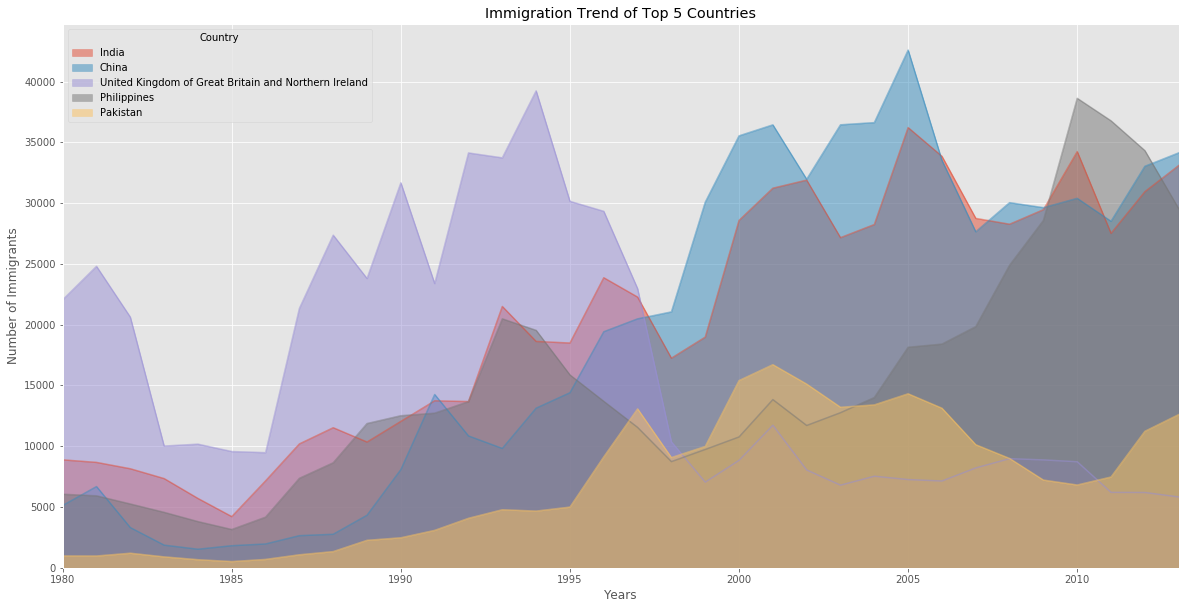

In [49]:
df_top5.index = df_top5.index.map(int) # let's change the index values of df_top5 to type integer for plotting
df_top5.plot(kind='area', 
             stacked=False,
             figsize=(20, 10), # pass a tuple (x, y) size
             )

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

The unstacked plot has a default transparency (alpha value) at 0.5. We can modify this value by passing in the `alpha` parameter.

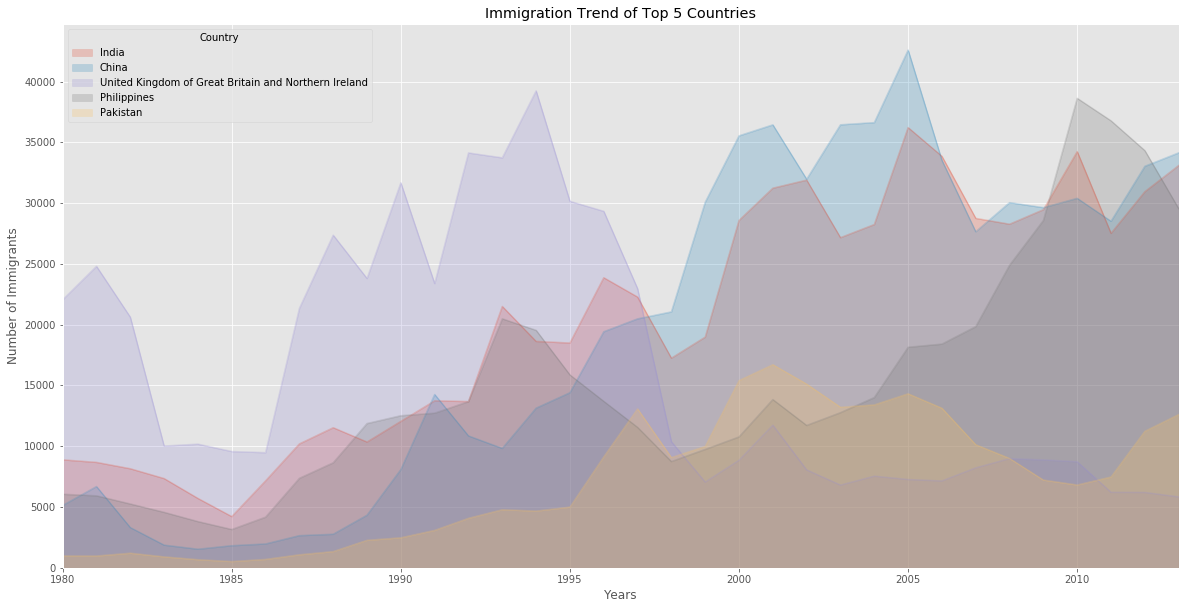

In [50]:
df_top5.plot(kind='area', 
             alpha=0.25, # 0-1, default value a= 0.5
             stacked=False,
             figsize=(20, 10),
            )

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

### 3. Histograms <a id="3"></a>

Before we proceed with creating the histogram plot, let's first examine the data split into intervals. To do this, we will us **Numpy**'s `histrogram` method to get the bin ranges and frequency counts as follows:

In [51]:
# let's quickly view the 2013 data
df_can['2013'].head()

Country
India                                                   33087
China                                                   34129
United Kingdom of Great Britain and Northern Ireland     5827
Philippines                                             29544
Pakistan                                                12603
Name: 2013, dtype: int64

In [52]:
# np.histogram returns 2 values
count, bin_edges = np.histogram(df_can['2013'])

print(count) # frequency count
print(bin_edges) # bin ranges, default = 10 bins

# By default, the histrogram method breaks up the dataset into 10 bins.
#The figure below summarizes the bin ranges and the frequency distribution of immigration in 2013.

[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


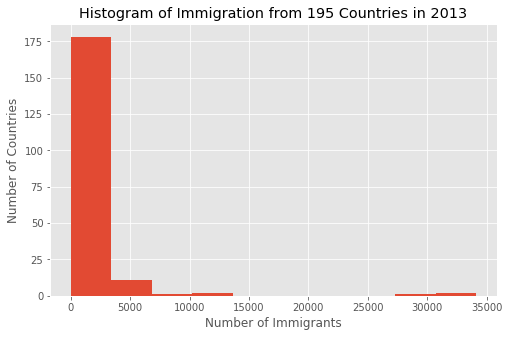

In [53]:
df_can['2013'].plot(kind='hist', figsize=(8, 5))

plt.title('Histogram of Immigration from 195 Countries in 2013') # add a title to the histogram
plt.ylabel('Number of Countries') # add y-label
plt.xlabel('Number of Immigrants') # add x-label

plt.show()

Notice that the x-axis labels do not match with the bin size. This can be fixed by passing in a xticks keyword that contains the list of the bin sizes, as follows:

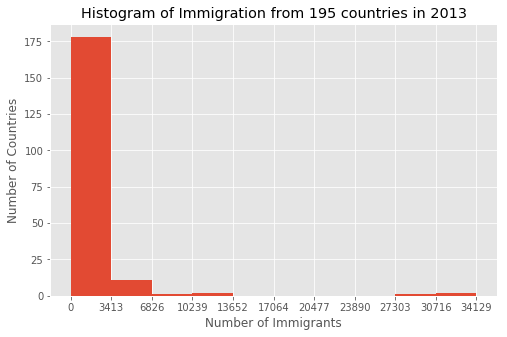

In [54]:
# 'bin_edges' is a list of bin intervals
count, bin_edges = np.histogram(df_can['2013'])

df_can['2013'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)

plt.title('Histogram of Immigration from 195 countries in 2013') # add a title to the histogram
plt.ylabel('Number of Countries') # add y-label
plt.xlabel('Number of Immigrants') # add x-label

plt.show()

We can also plot multiple histograms on the same plot.

In [55]:
# let's quickly view the dataset 
df_can.loc[['Denmark', 'Norway', 'Sweden'], years]

1980  1981  1982  1983  1984  1985  1986  1987  1988  1989  ...   \
Country                                                              ...    
Denmark   272   293   299   106    93    73    93   109   129   129  ...    
Norway    116    77   106    51    31    54    56    80    73    76  ...    
Sweden    281   308   222   176   128   158   187   198   171   182  ...    

         2004  2005  2006  2007  2008  2009  2010  2011  2012  2013  
Country                                                              
Denmark    89    62   101    97   108    81    92    93    94    81  
Norway     73    57    53    73    66    75    46    49    53    59  
Sweden    129   205   139   193   165   167   159   134   140   140  

[3 rows x 34 columns]

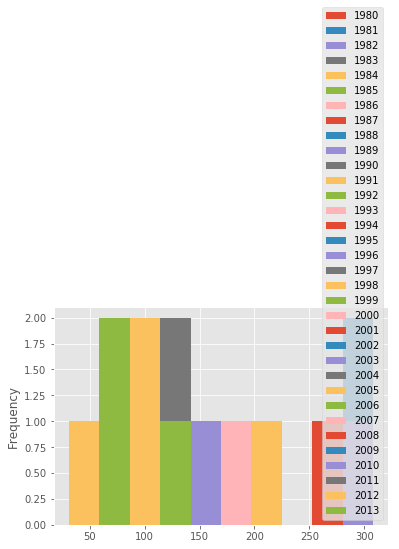

In [56]:
# generate histogram
df_can.loc[['Denmark', 'Norway', 'Sweden'], years].plot.hist()

Instead of plotting the population frequency distribution of the population for the 3 countries, pandas instead plotted the population frequency distribution for the years.

This can be easily fixed by first transposing the dataset, and then plotting as shown below.

In [57]:
# transpose dataframe
df_t = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
df_t.head()

Country  Denmark  Norway  Sweden
1980         272     116     281
1981         293      77     308
1982         299     106     222
1983         106      51     176
1984          93      31     128

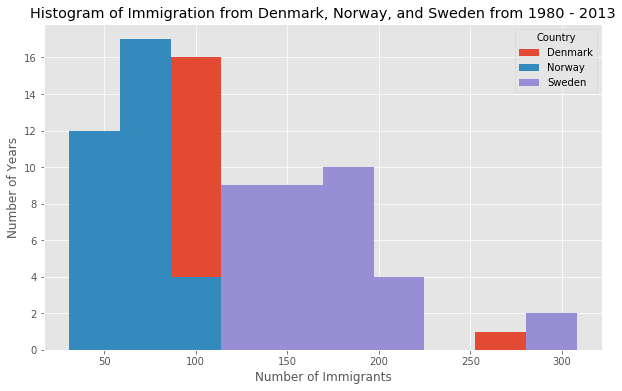

In [58]:
# generate histogram
df_t.plot(kind='hist', figsize=(10, 6))

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

Let's make a few modifications to improve the impact and aesthetics of the previous plot:
* increase the bin size to 15 by passing in `bins` parameter
* set transparency to 60% by passing in `alpha` paramemter
* label the x-axis by passing in `x-label` paramater
* change the colors of the plots by passing in `color` parameter

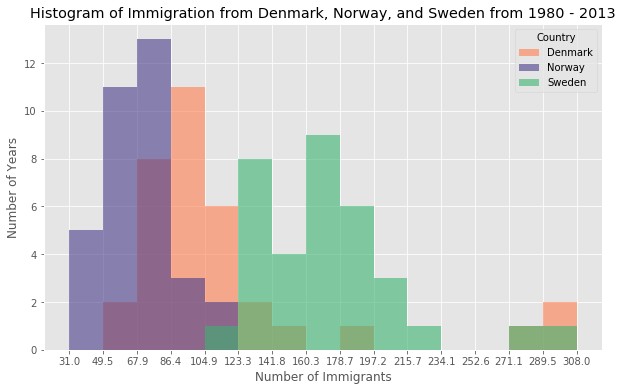

In [59]:
# let's get the x-tick values
count, bin_edges = np.histogram(df_t, 15)

# un-stacked histogram
df_t.plot(kind ='hist', 
          figsize=(10, 6),
          bins=15,
          alpha=0.6,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen']
         )

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

If we do no want the plots to overlap each other, we can stack them using the `stacked` paramemter. Let's also adjust the min and max x-axis labels to remove the extra gap on the edges of the plot. We can pass a tuple (min,max) using the `xlim` paramater, as show below.

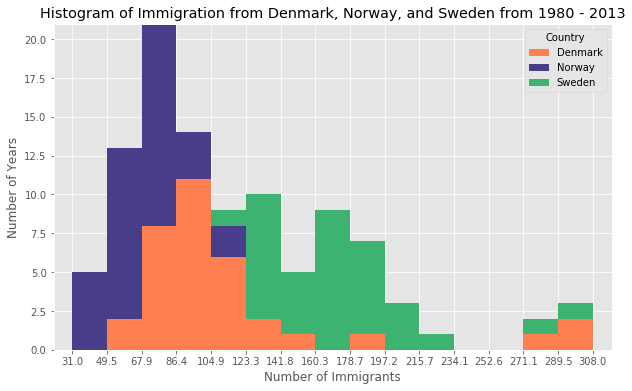

In [60]:
count, bin_edges = np.histogram(df_t, 15)
xmin = bin_edges[0] - 10   #  first bin value is 31.0, adding buffer of 10 for aesthetic purposes 
xmax = bin_edges[-1] + 10  #  last bin value is 308.0, adding buffer of 10 for aesthetic purposes

# stacked Histogram
df_t.plot(kind='hist',
          figsize=(10, 6), 
          bins=15,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen'],
          stacked=True,
          xlim=(xmin, xmax)
         )

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants') 

plt.show()

### 4.  Bar Charts (Dataframe) <a id="4"></a>

A bar plot is a way of representing data where the *length* of the bars represents the magnitude/size of the feature/variable. Bar graphs usually represent numerical and categorical variables grouped in intervals. 

To create a bar plot, we can pass one of two arguments via `kind` parameter in `plot()`:

* `kind=bar` creates a *vertical* bar plot
* `kind=barh` creates a *horizontal* bar plot

Let's compare the number of Icelandic immigrants (country = 'Iceland') to Canada from year 1980 to 2013. 

In [61]:
# step 1: get the data
df_iceland = df_can.loc['Iceland', years]
df_iceland.head()

1980    17
1981    33
1982    10
1983     9
1984    13
Name: Iceland, dtype: object

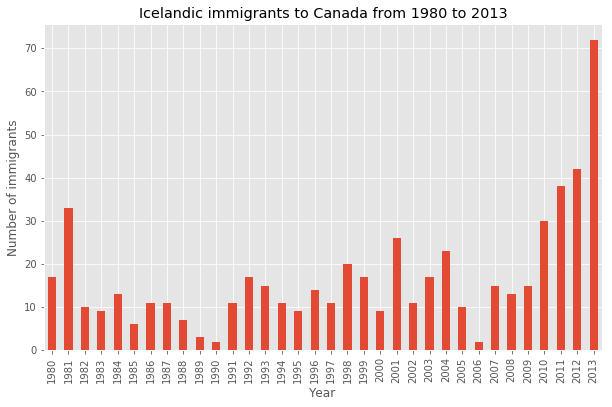

In [62]:
# step 2: plot data
df_iceland.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Year') # add to x-label to the plot
plt.ylabel('Number of immigrants') # add y-label to the plot
plt.title('Icelandic immigrants to Canada from 1980 to 2013') # add title to the plot

plt.show()

The bar plot above shows the total number of immigrants broken down by each year. We can clearly see the impact of the financial crisis; the number of immigrants to Canada started increasing rapidly after 2008. 

Let's annotate this on the plot using the `annotate` method of the **scripting layer** or the **pyplot interface**. We will pass in the following parameters:
- `s`: str, the text of annotation.
- `xy`: Tuple specifying the (x,y) point to annotate (in this case, end point of arrow).
- `xytext`: Tuple specifying the (x,y) point to place the text (in this case, start point of arrow).
- `xycoords`: The coordinate system that xy is given in - 'data' uses the coordinate system of the object being annotated (default).
- `arrowprops`: Takes a dictionary of properties to draw the arrow:
    - `arrowstyle`: Specifies the arrow style, `'->'` is standard arrow.
    - `connectionstyle`: Specifies the connection type. `arc3` is a straight line.
    - `color`: Specifes color of arror.
    - `lw`: Specifies the line width.

I encourage you to read the Matplotlib documentation for more details on annotations: 
http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.annotate.

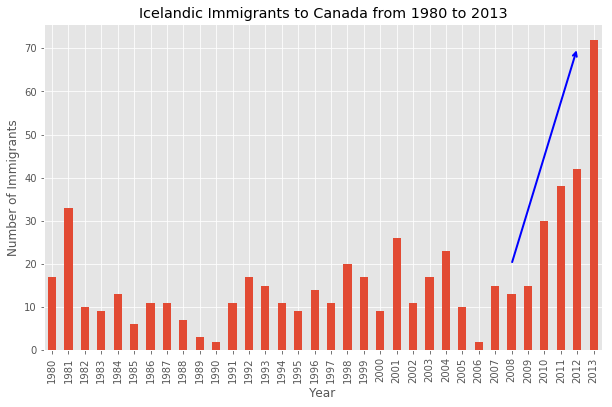

In [63]:
df_iceland.plot(kind='bar', figsize=(10, 6), rot=90) # rotate the bars by 90 degrees

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Annotate arrow
plt.annotate('',                      # s: str. Will leave it blank for no text
             xy=(32, 70),             # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),         # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',         # will use the coordinate system of the object being annotated 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
            )

plt.show()

Let's also annotate a text to go over the arrow.  We will pass in the following additional parameters:
- `rotation`: rotation angle of text in degrees (counter clockwise)
- `va`: vertical alignment of text [‘center’ | ‘top’ | ‘bottom’ | ‘baseline’]
- `ha`: horizontal alignment of text [‘center’ | ‘right’ | ‘left’]

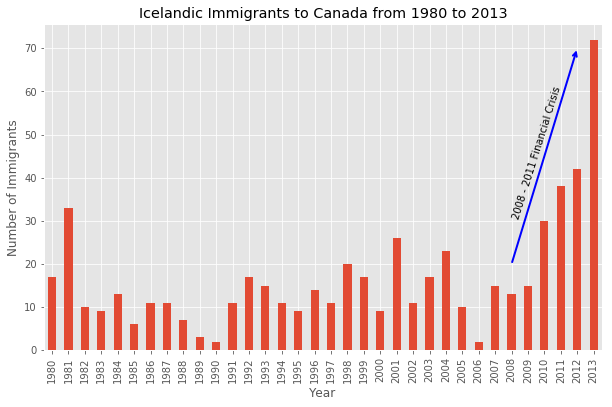

In [64]:
df_iceland.plot(kind='bar', figsize=(10, 6), rot=90) 

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Annotate arrow
plt.annotate('',                      # s: str. will leave it blank for no text
             xy=(32, 70),             # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),         # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',         # will use the coordinate system of the object being annotated 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
            )

# Annotate Text
plt.annotate('2008 - 2011 Financial Crisis', # text to display
             xy=(28, 30),                    # start the text at at point (year 2008 , pop 30)
             rotation=72.5,                  # based on trial and error to match the arrow
             va='bottom',                    # want the text to be vertically 'bottom' aligned
             ha='left',                      # want the text to be horizontally 'left' algned.
            )

plt.show()

### 5. Pie Charts <a id="5"></a>

A `pie chart` is a circualr graphic that displays numeric proportions by dividing a circle (or pie) into proportional slices. You are most likely already familiar with pie charts as it is widely used in business and media. We can create pie charts in Matplotlib by passing in the `kind=pie` keyword.

Let's use a pie chart to explore the proportion (percentage) of new immigrants grouped by continents for the entire time period from 1980 to 2013. 

Step 1: Gather data. 

We will use *pandas* `groupby` method to summarize the immigration data by `Continent`. The general process of `groupby` involves the following steps:

1. **Split:** Splitting the data into groups based on some criteria.
2. **Apply:** Applying a function to each group independently:
       .sum()
       .count()
       .mean() 
       .std() 
       .aggregate()
       .apply()
       .etc..
3. **Combine:** Combining the results into a data structure.

In [65]:
# group countries by continents and apply sum() function 
df_continents = df_can.groupby('Continent', axis=0).sum()

# note: the output of the groupby method is a `groupby' object. 
# we can not use it further until we apply a function (eg .sum())
print(type(df_can.groupby('Continent', axis=0)))

df_continents.head()

<class 'pandas.core.groupby.DataFrameGroupBy'>


1980   1981   1982   1983   1984   1985  \
Continent                                                                   
Africa                            3951   4363   3819   2671   2639   2650   
Asia                             31025  34314  30214  24696  27274  23850   
Europe                           39760  44802  42720  24638  22287  20844   
Latin America and the Caribbean  13081  15215  16769  15427  13678  15171   
Northern America                  9378  10030   9074   7100   6661   6543   

                                  1986   1987   1988   1989   ...       2005  \
Continent                                                     ...              
Africa                            3782   7494   7552   9894   ...      27523   
Asia                             28739  43203  47454  60256   ...     159253   
Europe                           24370  46698  54726  60893   ...      35955   
Latin America and the Caribbean  21179  28471  21924  25060   ...      24747   
Northern America                  7074   7705   6469   6790   ...       8394   

                                   2006    2007    2008    2009    2010  \
Continent                                                                 
Africa                            29188   28284   29890   34534   40892   
Asia                             149054  133459  139894  141434  163845   
Europe                            33053   33495   34692   35078   33425   
Latin America and the Caribbean   24676   26011   26547   26867   28818   
Northern America                   9613    9463   10190    8995    8142   

                                   2011    2012    2013    Total  
Continent                                                         
Africa                            35441   38083   38543   618948  
Asia                             146894  152218  155075  3317794  
Europe                            26778   29177   28691  1410947  
Latin America and the Caribbean   27856   27173   24950   765148  
Northern America                   7677    7892    8503   241142  

[5 rows x 35 columns]

Step 2: Plot the data. We will pass in `kind = 'pie'` keyword, along with the following additional parameters:
- `autopct` -  is a string or function used to label the wedges with their numeric value. The label will be placed inside the wedge. If it is a format string, the label will be `fmt%pct`.
- `startangle` - rotates the start of the pie chart by angle degrees counterclockwise from the x-axis.
- `shadow` - Draws a shadow beneath the pie (to give a 3D feel).

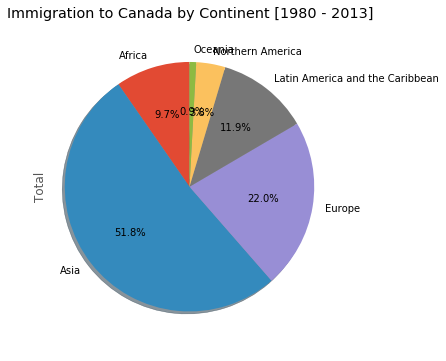

In [66]:
# autopct create %, start angle represent starting point
df_continents['Total'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            )

plt.title('Immigration to Canada by Continent [1980 - 2013]')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

The above visual is not very clear, the numbers and text overlap in some instances. Let's make a few modifications to improve the visuals:

* Remove the text labels on the pie chart by passing in `legend` and add it as a seperate legend using `plt.legend()`.
* Push out the percentages to sit just outside the pie chart by passing in `pctdistance` parameter.
* Pass in a custom set of colors for continents by passing in `colors` parameter.
* **Explode** the pie chart to emphasize the lowest three continents (Africa, North America, and Latin America and Carribbean) by pasing in `explode` parameter.



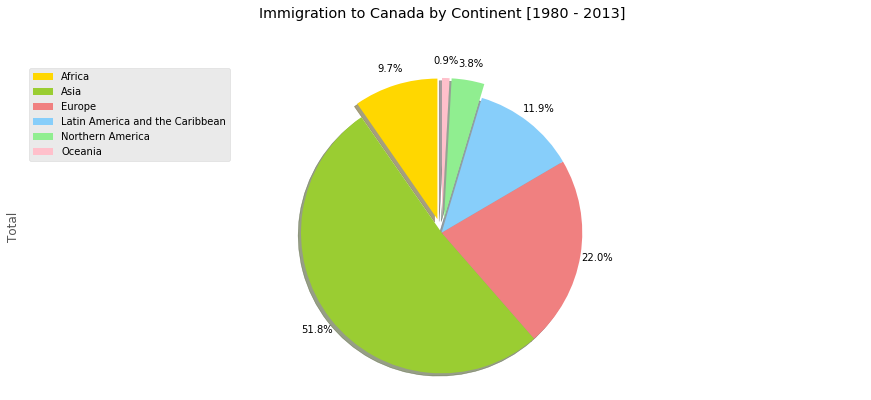

In [67]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

df_continents['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_continents.index, loc='upper left') 

plt.show()

### 6. Box plot <a id="6"></a>

A `box plot` is a way of statistically representing the *distribution* of the data through five main dimensions: 

- **Minimun:** Smallest number in the dataset.
- **First quartile:** Middle number between the `minimum` and the `median`.
- **Second quartile (Median):** Middle number of the (sorted) dataset.
- **Third quartile:** Middle number between `median` and `maximum`.
- **Maximum:** Highest number in the dataset.

To make a `box plot`, we can use `kind=box` in `plot` method invoked on a *pandas* series or dataframe.

Let's plot the box plot for the Japanese immigrants between 1980 - 2013.

Step 1: Get the dataset. Even though we are extracting the data for just one country, we will obtain it as a dataframe. This will help us with calling the `dataframe.describe()` method to view the percentiles.

In [68]:
# to get a dataframe, place extra square brackets around 'Japan'.
df_japan = df_can.loc[['Japan'], years].transpose()
df_japan.head()

Country  Japan
1980       701
1981       756
1982       598
1983       309
1984       246

Step 2: Plot by passing in `kind='box'`.

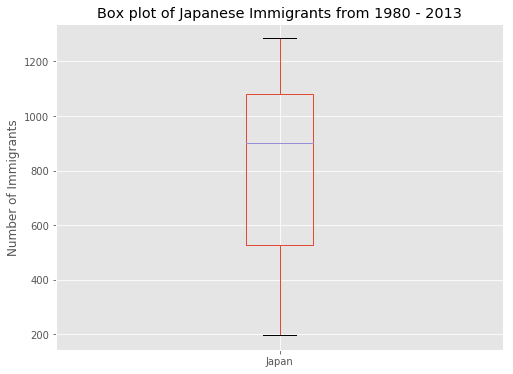

In [69]:
df_japan.plot(kind='box', figsize=(8, 6))

plt.title('Box plot of Japanese Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')

plt.show()

We can immediately make a few key observations from the plot above:
1. The minimum number of immigrants is around 200 (min), maximum number is around 1300 (max), and  median number of immigrants is around 900 (median).
2. 25% of the years for period 1980 - 2013 had an annual immigrant count of ~500 or fewer (First quartile).
2. 75% of the years for period 1980 - 2013 had an annual immigrant count of ~1100 or fewer (Third quartile).

We can view the actual numbers by calling the `describe()` method on the dataframe.

One of the key benefits of box plots is comparing the distribution of multiple datasets. Let's analyize these two countries further using box plots.

**Question:** Compare the distribution of the number of new immigrants from India and China for the period 1980 - 2013.

We can observe that, while both countries have around the same median immigrant population (~20,000),  China's immigrant population range is more spread out than India's. The maximum population from India for any year (36,210) is around 15% lower than the maximum population from China (42,584).

If you prefer to create horizontal box plots, you can pass the `vert` parameter in the **plot** function and assign it to *False*. You can also specify a different color in case you are not a big fan of the default red color.

In [72]:
df_CI= df_can.loc[['China', 'India'], years].transpose()
df_CI.head()

Country  China  India
1980      5123   8880
1981      6682   8670
1982      3308   8147
1983      1863   7338
1984      1527   5704

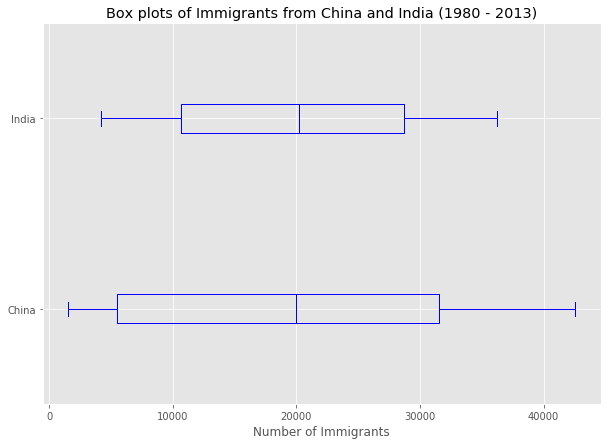

In [73]:
# horizontal box plots
df_CI.plot(kind='box', figsize=(10, 7), color='blue', vert=False)

plt.title('Box plots of Immigrants from China and India (1980 - 2013)')
plt.xlabel('Number of Immigrants')

plt.show()

**Subplots**

Often times we might want to plot multiple plots within the same figure. For example, we might want to perform a side by side comparison of the box plot with the line plot of China and India's immigration.

To visualize multiple plots together, we can create a **`figure`** (overall canvas) and divide it into **`subplots`**, each containing a plot. With **subplots**, we usually work with the **artist layer** instead of the **scripting layer**. 

Typical syntax is : <br>
```python
    fig = plt.figure() # create figure
    ax = fig.add_subplot(nrows, ncols, plot_number) # create subplots
```
Where
- `nrows` and `ncols` are used to notionally split the figure into (`nrows` \* `ncols`) sub-axes,  
- `plot_number` is used to identify the particular subplot that this function is to create within the notional grid. `plot_number` starts at 1, increments across rows first and has a maximum of `nrows` * `ncols` as shown below.

<img src="https://ibm.box.com/shared/static/03rhrfcealyoi83tigscovgglfchfyor.png" width=500 align="center">

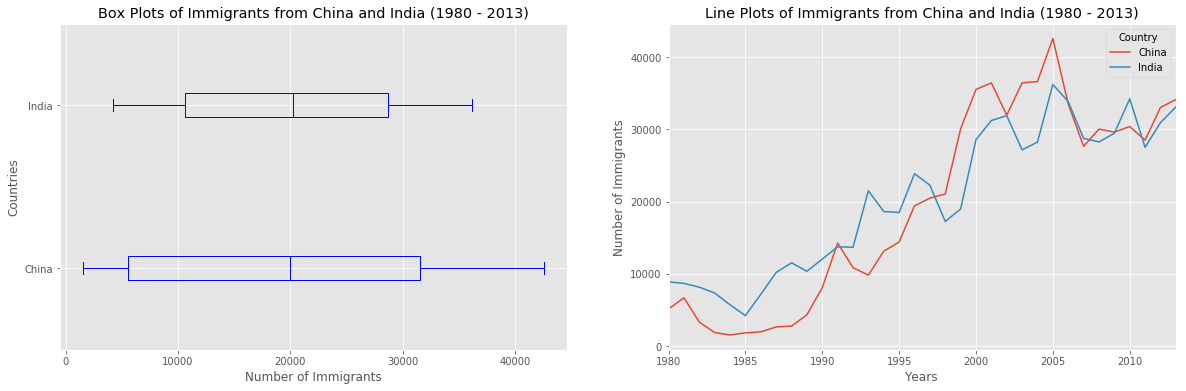

In [74]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Box plot
df_CI.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) # add to subplot 1
ax0.set_title('Box Plots of Immigrants from China and India (1980 - 2013)')
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries')

# Subplot 2: Line plot
df_CI.plot(kind='line', figsize=(20, 6), ax=ax1) # add to subplot 2
ax1.set_title ('Line Plots of Immigrants from China and India (1980 - 2013)')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')

plt.show()

### 7. Scatter plot <a id="7"></a>

A `scatter plot` (2D) is a useful method of comparing variables against each other. `Scatter` plots look similar to `line plots` in that they both map independent and dependent variables on a 2D graph. While the datapoints are connected together by a line in a line plot, they are not connected in a scatter plot. The data in a scatter plot is considered to express a trend. With further analysis using tools like regression, we can mathematically calculate this relationship and use it to predict trends outside the dataset.

Let's start by exploring the following:

Using a `scatter plot`, let's visualize the trend of total immigrantion to Canada (all countries combined) for the years 1980 - 2013.

In [75]:
# we can use the sum() method to get the total population per year
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

# change the years to type int (useful for regression later on)
df_tot.index = map(int, df_tot.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace = True)

# rename columns
df_tot.columns = ['year', 'total']

# view the final dataframe
df_tot.head()

year   total
0  1980   99137
1  1981  110563
2  1982  104271
3  1983   75550
4  1984   73417

Step 2: Plot the data. In `Matplotlib`, we can create a `scatter` plot set by passing in `kind='scatter'` as plot argument. We will also need to pass in `x` and `y` keywords to specify the columns that go on the x- and the y-axis.

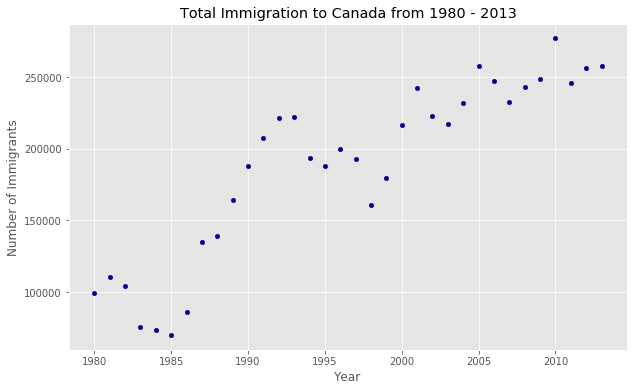

In [76]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

So let's try to plot a linear line of best fit, and use it to  predict the number of immigrants in 2015.

Step 1: Get the equation of line of best fit. We will use **Numpy**'s `polyfit()` method by passing in the following:
- `x`: x-coordinates of the data. 
- `y`: y-coordinates of the data. 
- `deg`: Degree of fitting polynomial. 1 = linear, 2 = quadratic, and so on.

In [77]:
x = df_tot['year']      # year on x-axis
y = df_tot['total']     # total on y-axis
fit = np.polyfit(x, y, deg=1)

fit

array([ 5.56709228e+03, -1.09261952e+07])

The output is an array with the polynomial coefficients, highest powers first. Since we are plotting a linear regression `y= a*x + b`, our output has 2 elements `[5.56709228e+03, -1.09261952e+07]` with the the slope in position 0 and intercept in position 1. 

Step 2: Plot the regression line on the `scatter plot`.

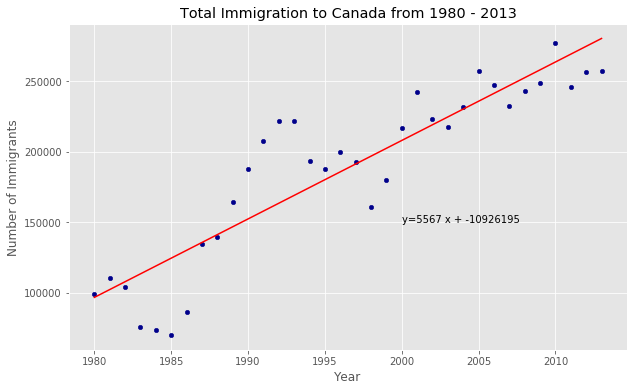

'No. Immigrants = 5567 * Year + -10926195'

In [78]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# plot line of best fit
plt.plot(x, fit[0] * x + fit[1], color='red') # recall that x is the Years
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))

plt.show()

# print out the line of best fit
'No. Immigrants = {0:.0f} * Year + {1:.0f}'.format(fit[0], fit[1]) 

Using the equation of line of best fit, we can estimate the number of immigrants in 2015:
```python
No. Immigrants = 5567 * Year - 10926195
No. Immigrants = 5567 * 2015 - 10926195
No. Immigrants = 291,310
```
When compared to the actuals from Citizenship and Immigration Canada's (CIC) [2016 Annual Report](http://www.cic.gc.ca/english/resources/publications/annual-report-2016/index.asp), we see that Canada accepted 271,845 immigrants in 2015. Our estimated value of 291,310 is within 7% of the actual number, which is pretty good considering our original data came from United Nations (and might differ slightly from CIC data).

As a side note, we can observe that immigration took a dip around 1993 - 1997. Further analysis into the topic revealed that in 1993 Canada introcuded Bill C-86 which introduced revisions to the refugee determination system, mostly restrictive. Further amendments to the Immigration Regulations cancelled the sponsorship required for "assisted relatives" and reduced the points awarded to them, making it more difficult for family members (other than nuclear family) to immigrate to Canada. These restrictive measures had a direct impact on the immigration numbers for the next several years.

### 8.  Bubble Plots  <a id="8"></a>

A `bubble plot` is a variation of the `scatter plot` that displays three dimensions of data (x, y, z). The datapoints are replaced with bubbles, and the size of the bubble is determined by the third variable 'z', also known as the weight. In `maplotlib`, we can pass in an array or scalar to the keyword `s` to `plot()`, that contains the weight of each point.

**Let's start by analyzing the effect of Argentina's great depression**.

Argentina suffered a great depression from 1998 - 2002, which caused widespread unemployment, riots, the fall of the government, and a default on the country's foreign debt. In terms of income, over 50% of Argentines were poor, and seven out of ten Argentine children were poor at the depth of the crisis in 2002. 

Let's analyze the effect of this crisis, and compare Argentina's immigration to that of it's neighbour Brazil. Let's do that using a `bubble plot` of immigration from Brazil and Argentina for the years 1980 - 2013. We will set the weights for the bubble as the *normalized* value of the population for each year.

Step 1: Get the data for Brazil and Argentina. Like in the previous example, we will convert the `Years` to type int and bring it in the dataframe.

In [79]:
df_can_t = df_can[years].transpose() # transposed dataframe

# cast the Years (the index) to type int
df_can_t.index = map(int, df_can_t.index)

# let's label the index. This will automatically be the column name when we reset the index
df_can_t.index.name = 'Year'

# reset index to bring the Year in as a column
df_can_t.reset_index(inplace=True)

# view the changes
df_can_t.head()

Country  Year  India  China  \
0        1980   8880   5123   
1        1981   8670   6682   
2        1982   8147   3308   
3        1983   7338   1863   
4        1984   5704   1527   

Country  United Kingdom of Great Britain and Northern Ireland  Philippines  \
0                                                    22045            6051   
1                                                    24796            5921   
2                                                    20620            5249   
3                                                    10015            4562   
4                                                    10170            3801   

Country  Pakistan  United States of America  Iran (Islamic Republic of)  \
0             978                      9378                        1172   
1             972                     10030                        1429   
2            1201                      9074                        1822   
3             900                      7100                        1592   
4             668                      6661                        1977   

Country  Sri Lanka  Republic of Korea  ...    Kiribati  Vanuatu  \
0              185               1011  ...           0        0   
1              371               1456  ...           0        0   
2              290               1572  ...           0        0   
3              197               1081  ...           1        0   
4             1086                847  ...           0        0   

Country  Sao Tome and Principe  Tuvalu  American Samoa  San Marino  \
0                            0       0               0           1   
1                            0       1               1           0   
2                            0       0               0           0   
3                            0       0               0           0   
4                            0       1               0           0   

Country  New Caledonia  Marshall Islands  Western Sahara  Palau  
0                    0                 0               0      0  
1                    0                 0               0      0  
2                    0                 0               0      0  
3                    0                 0               0      0  
4                    0                 0               0      0  

[5 rows x 196 columns]

Step 2: Create the normalized weights. 

There are several methods of normalizations in statistics, each with its own use. In this case, we will use [feature scaling](https://en.wikipedia.org/wiki/Feature_scaling) to bring all values into the range [0,1].

In [80]:
# normalize Brazil data
norm_brazil = (df_can_t['Brazil'] - df_can_t['Brazil'].min()) / (df_can_t['Brazil'].max() - df_can_t['Brazil'].min())

# normalize Argentina data
norm_argentina = (df_can_t['Argentina'] - df_can_t['Argentina'].min()) / (df_can_t['Argentina'].max() - df_can_t['Argentina'].min())

Step 3: Plot the data. 
- To plot two different scatter plots in one plot, we can include the axes one plot into the other by passing it via the `ax` parameter. 
- We will also pass in the weights using the `s` parameter. Given that the normalized weights are between 0-1, they won't be visible on the plot. Therefore we will:
    - multiply weights by 2000 to scale it up on the graph, and,
    - add 10 to compensate for the min value (which has a 0 weight and therefore scale with x2000).

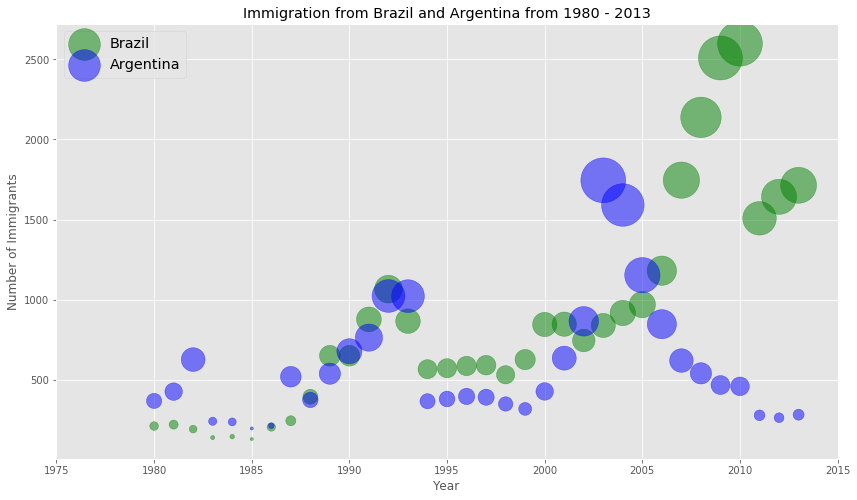

In [81]:
# Brazil
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Brazil',
                    figsize=(14, 8),
                    alpha=0.5,                  # transparency
                    color='green',
                    s=norm_brazil * 2000 + 10,  # pass in weights 
                    xlim=(1975, 2015)
                   )

# Argentina
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Argentina',
                    alpha=0.5,
                    color="blue",
                    s=norm_argentina * 2000 + 10,
                    ax = ax0
                   )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina from 1980 - 2013')
ax0.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large')

The size of the bubble corresponds to the magnitude of immigrating population for that year, compared to the 1980 - 2013 data. The larger the bubble, the more immigrants in that year.

From the plot above, we can see a corresponding increase in immigration from Argentina during the 1998 - 2002 great depression. We can also observe a similar spike around 1985 to 1993. In fact, Argentina had suffered a great depression from 1974 - 1990, just before the onset of 1998 - 2002 great depression. 

On a similar note, Brazil suffered the *Samba Effect* where the Brazilian real (currency) dropped nearly 35% in 1999. There was a fear of a South American financial crisis as many South American countries were heavily dependent on industrial exports from Brazil. The Brazilian government subsequently adopted an austerity program, and the economy slowly recovered over the years, culminating in a surge in 2010. The immigration data reflect these events.

### 9 Waffle Charts <a id="9"></a>

A `waffle chart` is an interesting visualization that is normally created to display progress toward goals. It is commonly an effective option when you are trying to add interesting visualization features to a visual that consists mainly of cells, such as an Excel dashboard.

In [94]:
import matplotlib.patches as mpatches

In [95]:
# let's create a new dataframe for these three countries 
df_dsn = df_can.loc[['Denmark', 'Norway', 'Sweden'], :]

# let's take a look at our dataframe
df_dsn

Continent           Region            DevName  1980  1981  1982  1983  \
Country                                                                         
Denmark    Europe  Northern Europe  Developed regions   272   293   299   106   
Norway     Europe  Northern Europe  Developed regions   116    77   106    51   
Sweden     Europe  Northern Europe  Developed regions   281   308   222   176   

         1984  1985  1986  ...    2005  2006  2007  2008  2009  2010  2011  \
Country                    ...                                               
Denmark    93    73    93  ...      62   101    97   108    81    92    93   
Norway     31    54    56  ...      57    53    73    66    75    46    49   
Sweden    128   158   187  ...     205   139   193   165   167   159   134   

         2012  2013  Total  
Country                     
Denmark    94    81   3901  
Norway     53    59   2327  
Sweden    140   140   5866  

[3 rows x 38 columns]

Unfortunately, unlike R, `waffle` charts are not built into any of the Python visualization libraries. Therefore, we will learn how to create them from scratch.

**Step 1.** The first step into creating a waffle chart is determing the proportion of each category with respect to the total.

In [96]:
# compute the proportion of each category with respect to the total
total_values = sum(df_dsn['Total'])
category_proportions = [(float(value) / total_values) for value in df_dsn['Total']]

# print out proportions
for i, proportion in enumerate(category_proportions):
    print (df_dsn.index.values[i] + ': ' + str(proportion))

Denmark: 0.32255663965602777
Norway: 0.1924094592359848
Sweden: 0.48503390110798744


**Step 2.** The second step is defining the overall size of the `waffle` chart.

In [97]:
width = 40 # width of chart
height = 10 # height of chart

total_num_tiles = width * height # total number of tiles

print ('Total number of tiles is ', total_num_tiles)

Total number of tiles is  400


**Step 3.** The third step is using the proportion of each category to determe it respective number of tiles

In [98]:
# compute the number of tiles for each catagory
tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

# print out number of tiles per category
for i, tiles in enumerate(tiles_per_category):
    print (df_dsn.index.values[i] + ': ' + str(tiles))

Denmark: 129.0
Norway: 77.0
Sweden: 194.0


Based on the calculated proportions, Denmark will occupy 129 tiles of the `waffle` chart, Norway will occupy 77 tiles, and Sweden will occupy 194 tiles.

**Step 4.** The fourth step is creating a matrix that resembles the `waffle` chart and populating it.

In [99]:
# initialize the waffle chart as an empty matrix
waffle_chart = np.zeros((height, width))

# define indices to loop through waffle chart
category_index = 0
tile_index = 0

# populate the waffle chart
for col in range(width):
    for row in range(height):
        tile_index += 1

        # if the number of tiles populated for the current category is equal to its corresponding allocated tiles...
        if tile_index > sum(tiles_per_category[0:category_index]):
            # ...proceed to the next category
            category_index += 1       
            
        # set the class value to an integer, which increases with class
        waffle_chart[row, col] = category_index
        
print ('Waffle chart populated!')

Waffle chart populated!


Let's take a peek at how the matrix looks like.

In [100]:
waffle_chart

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
   

As expected, the matrix consists of three categories and the total number of each category's instances matches the total number of tiles allocated to each category.

**Step 5.** Map the `waffle` chart matrix into a visual.

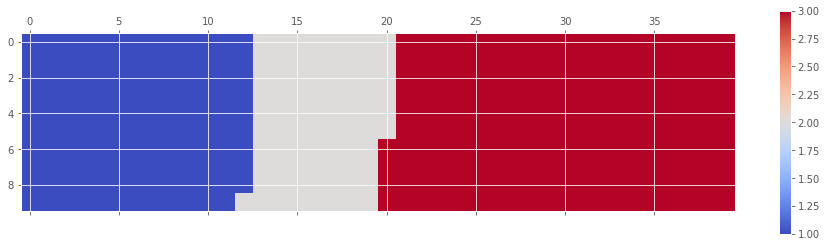

In [101]:
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

**Step 6.** Prettify the chart.

([], <a list of 0 Text yticklabel objects>)

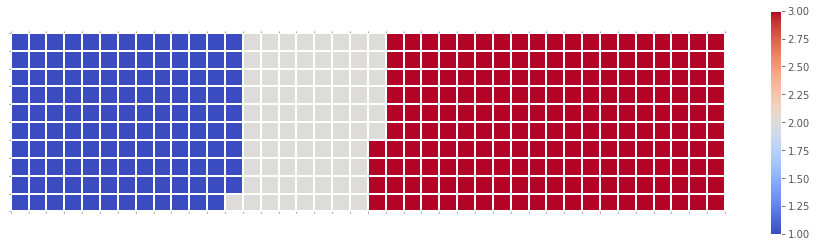

In [102]:
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

**Step 7.** Create a legend and add it to chart.

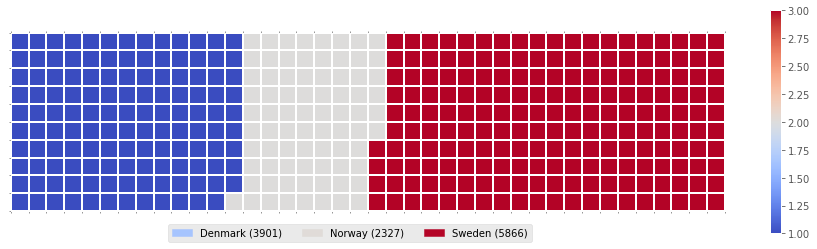

In [103]:
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

# compute cumulative sum of individual categories to match color schemes between chart and legend
values_cumsum = np.cumsum(df_dsn['Total'])
total_values = values_cumsum[len(values_cumsum) - 1]

# create legend
legend_handles = []
for i, category in enumerate(df_dsn.index.values):
    label_str = category + ' (' + str(df_dsn['Total'][i]) + ')'
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

# add legend to chart
plt.legend(handles=legend_handles,
           loc='lower center', 
           ncol=len(df_dsn.index.values),
           bbox_to_anchor=(0., -0.2, 0.95, .1)
          )

And there you go! What a good looking *delicious* `waffle` chart, don't you think?

Now it would very inefficient to repeat these seven steps every time we wish to create a `waffle` chart. So let's combine all seven steps into one function called *create_waffle_chart*. This function would take the following parameters as input:

> 1. **categories**: Unique categories or classes in dataframe.
> 2. **values**: Values corresponding to categories or classes.
> 3. **height**: Defined height of waffle chart.
> 4. **width**: Defined width of waffle chart.
> 5. **colormap**: Colormap class
> 6. **value_sign**: In order to make our function more generalizable, we will add this parameter to address signs that could be associated with a value such as %, $, and so on. **value_sign** has a default value of empty string.

In [104]:
def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):

    # compute the proportion of each category with respect to the total
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]

    # compute the total number of tiles
    total_num_tiles = width * height # total number of tiles
    print ('Total number of tiles is', total_num_tiles)
    
    # compute the number of tiles for each catagory
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

    # print out number of tiles per category
    for i, tiles in enumerate(tiles_per_category):
        print (df_dsn.index.values[i] + ': ' + str(tiles))
    
    # initialize the waffle chart as an empty matrix
    waffle_chart = np.zeros((height, width))

    # define indices to loop through waffle chart
    category_index = 0
    tile_index = 0

    # populate the waffle chart
    for col in range(width):
        for row in range(height):
            tile_index += 1

            # if the number of tiles populated for the current category 
            # is equal to its corresponding allocated tiles...
            if tile_index > sum(tiles_per_category[0:category_index]):
                # ...proceed to the next category
                category_index += 1       
            
            # set the class value to an integer, which increases with class
            waffle_chart[row, col] = category_index
    
    # instantiate a new figure object
    fig = plt.figure()

    # use matshow to display the waffle chart
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    # get the axis
    ax = plt.gca()

    # set minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
    # add dridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    # compute cumulative sum of individual categories to match color schemes between chart and legend
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]

    # create legend
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + ' (' + value_sign + str(values[i]) + ')'
            
        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    # add legend to chart
    plt.legend(
        handles=legend_handles,
        loc='lower center', 
        ncol=len(categories),
        bbox_to_anchor=(0., -0.2, 0.95, .1)
    )

Now to create a `waffle` chart, all we have to do is call the function `create_waffle_chart`. Let's define the input parameters:

In [105]:
width = 40 # width of chart
height = 10 # height of chart

categories = df_dsn.index.values # categories
values = df_dsn['Total'] # correponding values of categories

colormap = plt.cm.coolwarm # color map class

And now let's call our function to create a `waffle` chart.

Total number of tiles is 400
Denmark: 129.0
Norway: 77.0
Sweden: 194.0


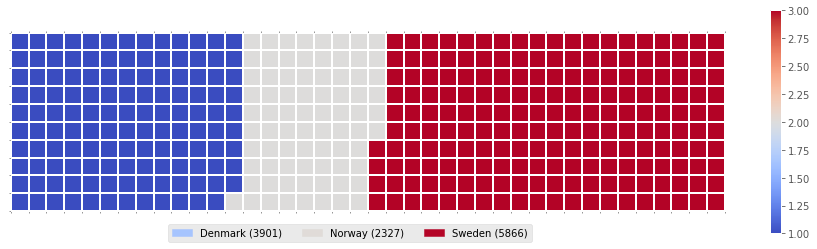

In [106]:
create_waffle_chart(categories, values, height, width, colormap)

There seems to be a new Python package for generating `waffle charts` called [PyWaffle](https://github.com/ligyxy/PyWaffle), but it looks like the repository is still being built. But feel free to check it out and play with it.

### 10. Word Clouds <a id="10"></a>


`Word` clouds (also known as text clouds or tag clouds) work in a simple way: the more a specific word appears in a source of textual data (such as a speech, blog post, or database), the bigger and bolder it appears in the word cloud.

Luckily, a Python package already exists in Python for generating `word` clouds. The package, called `word_cloud` was developed by **Andreas Mueller**. You can learn more about the package by following this [link](https://github.com/amueller/word_cloud/).

Let's use this package to learn how to generate a word cloud for a given text document.

First, let's install the package.

In [107]:
# install wordcloud
!conda install -c conda-forge wordcloud==1.4.1 --yes

# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /home/nbuser/anaconda3_420:

The following NEW packages will be INSTALLED:

    readline:  7.0-ha6073c6_4              
    wordcloud: 1.4.1-py35_0     conda-forge

The following packages will be UPDATED:

    conda:     4.3.31-py35_0                --> 4.5.11-py35_0        conda-forge
    pycosat:   0.6.1-py35_1                 --> 0.6.3-py35h470a237_1 conda-forge

The following packages will be SUPERSEDED by a higher-priority channel:

    conda-env: 2.6.0-h36134e3_1             --> 2.6.0-1              conda-forge

conda-env-2.6. 100% |################################| Time: 0:00:00 316.42 kB/s
readline-7.0-h 100% |################################| Time: 0:00:00   8.78 MB/s
pycosat-0.6.3- 100% |################################| Time: 0:00:00   3.89 MB/s
wordcloud-1.4. 100% |################################| Time: 0:00:00   6.64 MB/s
conda-4.5.11-p 100% |###########

`Word` clouds are commonly used to perform high-level analysis and visualization of text data. Accordinly, let's digress from the immigration dataset and work with an example that involves analyzing text data. Let's try to analyze a short novel written by **Lewis Carroll** titled *Alice's Adventures in Wonderland*. Let's go ahead and download a _.txt_ file of the novel.

In [108]:
# download file and save as alice_novel.txt
!wget --quiet https://ibm.box.com/shared/static/m54sjtrshpt5su20dzesl5en9xa5vfz1.txt -O alice_novel.txt

# open the file and read it into a variable alice_novel
alice_novel = open('alice_novel.txt', 'r').read()
    
print ('File downloaded and saved!')

File downloaded and saved!


Next, let's use the stopwords that we imported from `word_cloud`. We use the function *set* to remove any redundant stopwords.

In [109]:
stopwords = set(STOPWORDS)

Create a word cloud object and generate a word cloud. For simplicity, let's generate a word cloud using only the first 2000 words in the novel.

In [110]:
# instantiate a word cloud object
alice_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
alice_wc.generate(alice_novel)

Awesome! Now that the `word` cloud is created, let's visualize it.

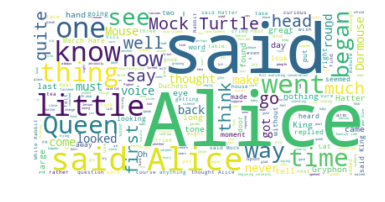

In [111]:
# display the word cloud
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Interesting! So in the first 2000 words in the novel, the most common words are **Alice**, **said**, **little**, **Queen**, and so on. Let's resize the cloud so that we can see the less frequent words a little better.

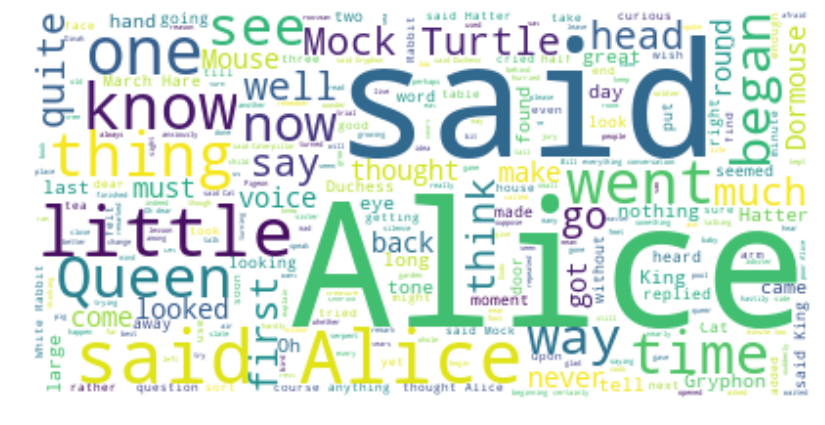

In [112]:
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

# display the cloud
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Much better! However, **said** isn't really an informative word. So let's add it to our stopwords and re-generate the cloud.

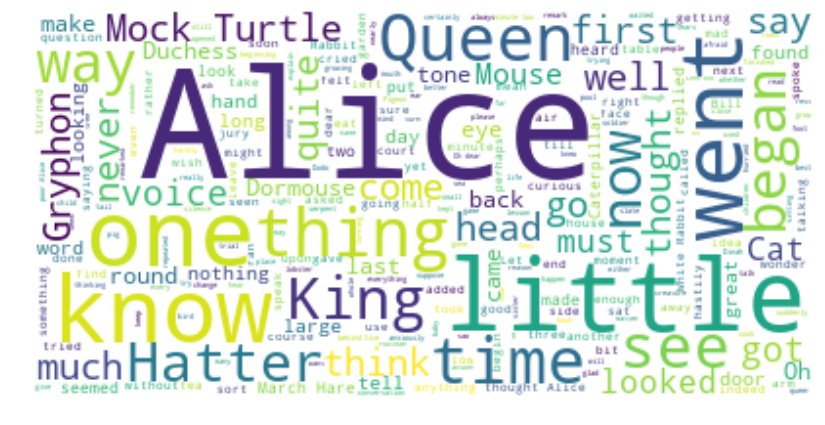

In [113]:
stopwords.add('said') # add the words said to stopwords

# re-generate the word cloud
alice_wc.generate(alice_novel)

# display the cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Excellent! This looks really interesting! Another cool thing you can implement with the `word_cloud` package is superimposing the words onto a mask of any shape. Let's use a mask of Alice and her rabbit. We already created the mask for you, so let's go ahead and download it and call it *alice_mask.png*.

In [116]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
from PIL import Image # converting images into arrays

In [117]:
# download image
!wget --quiet https://ibm.box.com/shared/static/3mpxgaf6muer6af7t1nvqkw9cqj85ibm.png -O alice_mask.png
    
# save mask to alice_mask
alice_mask = np.array(Image.open('alice_mask.png'))
    
print('Image downloaded and saved!')

Image downloaded and saved!


Let's take a look at how the mask looks like.

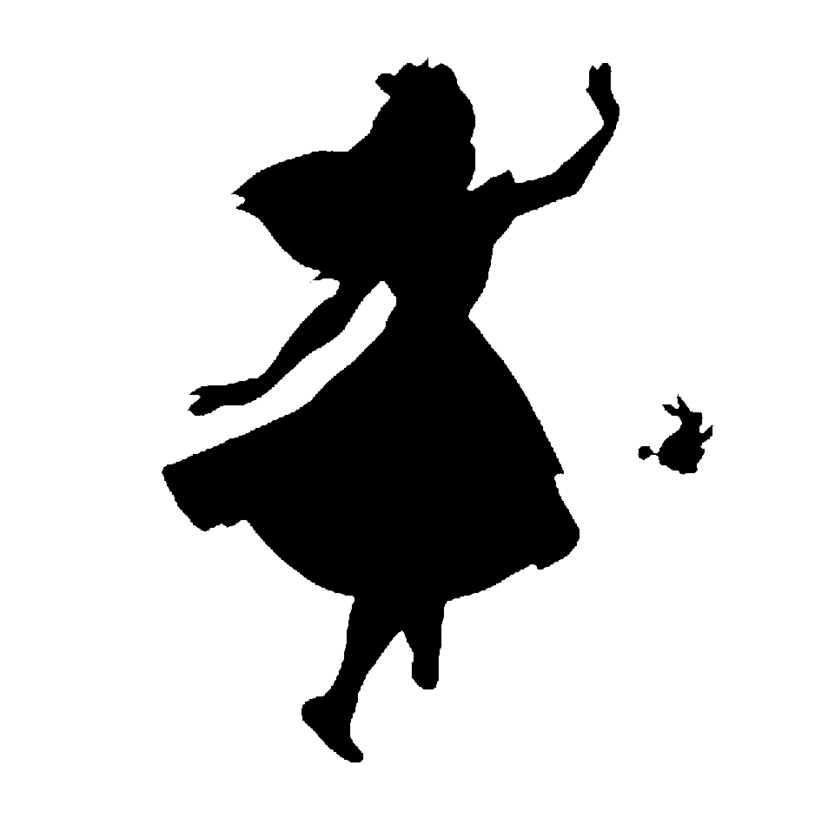

In [118]:
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

Shaping the `word` cloud according to the mask is straightforward using `word_cloud` package. For simplicity, we will continue using the first 2000 words in the novel.

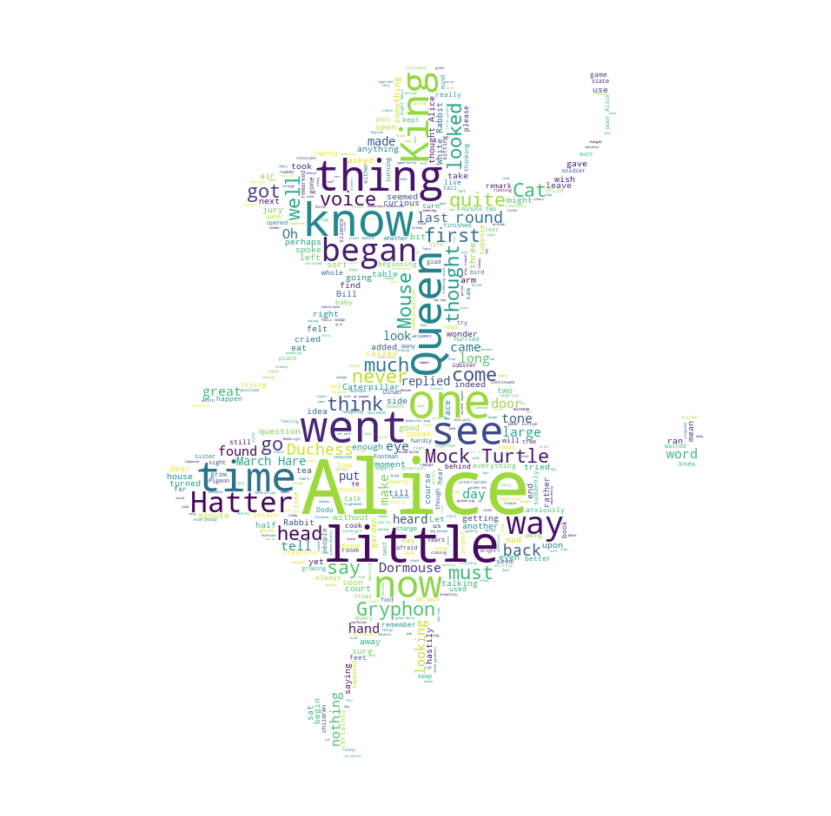

In [119]:
# instantiate a word cloud object
alice_wc = WordCloud(background_color='white', max_words=2000, mask=alice_mask, stopwords=stopwords)

# generate the word cloud
alice_wc.generate(alice_novel)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Really impressive!

Unfortunately, our immmigration data does not have any text data, but where there is a will there is a way. Let's generate sample text data from our immigration dataset, say text data of 90 words.

Let's recall how our data looks like.

In [120]:
df_can.head()

Continent  \
Country                                                        
India                                                   Asia   
China                                                   Asia   
United Kingdom of Great Britain and Northern Ir...    Europe   
Philippines                                             Asia   
Pakistan                                                Asia   

                                                                Region  \
Country                                                                  
India                                                    Southern Asia   
China                                                     Eastern Asia   
United Kingdom of Great Britain and Northern Ir...     Northern Europe   
Philippines                                         South-Eastern Asia   
Pakistan                                                 Southern Asia   

                                                               DevName   1980  \
Country                                                                         
India                                               Developing regions   8880   
China                                               Developing regions   5123   
United Kingdom of Great Britain and Northern Ir...   Developed regions  22045   
Philippines                                         Developing regions   6051   
Pakistan                                            Developing regions    978   

                                                     1981   1982   1983  \
Country                                                                   
India                                                8670   8147   7338   
China                                                6682   3308   1863   
United Kingdom of Great Britain and Northern Ir...  24796  20620  10015   
Philippines                                          5921   5249   4562   
Pakistan                                              972   1201    900   

                                                     1984  1985  1986   ...    \
Country                                                                 ...     
India                                                5704  4211  7150   ...     
China                                                1527  1816  1960   ...     
United Kingdom of Great Britain and Northern Ir...  10170  9564  9470   ...     
Philippines                                          3801  3150  4166   ...     
Pakistan                                              668   514   691   ...     

                                                     2005   2006   2007  \
Country                                                                   
India                                               36210  33848  28742   
China                                               42584  33518  27642   
United Kingdom of Great Britain and Northern Ir...   7258   7140   8216   
Philippines                                         18139  18400  19837   
Pakistan                                            14314  13127  10124   

                                                     2008   2009   2010  \
Country                                                                   
India                                               28261  29456  34235   
China                                               30037  29622  30391   
United Kingdom of Great Britain and Northern Ir...   8979   8876   8724   
Philippines                                         24887  28573  38617   
Pakistan                                             8994   7217   6811   

                                                     2011   2012   2013  \
Country                                                                   
India                                               27509  30933  33087   
China                                               28502  33024  34129   
United Kingdom of Great Britain and Northern Ir...   6204   6195   58

And what was the total immigration from 1980 to 2013?

In [121]:
total_immigration = df_can['Total'].sum()
total_immigration

6409153

Using countries with single-word names, let's duplicate each country's name based on how much they contribute to the total immigration.

In [122]:
max_words = 90
word_string = ''
for country in df_can.index.values:
    # check if country's name is a single-word name
    if len(country.split(' ')) == 1:
        repeat_num_times = int(df_can.loc[country, 'Total']/float(total_immigration)*max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)
                                     
# display the generated text
word_string

'India India India India India India India India India China China China China China China China China China Philippines Philippines Philippines Philippines Philippines Philippines Philippines Pakistan Pakistan Pakistan Poland Lebanon France Jamaica Romania Haiti Guyana Portugal Egypt Morocco Colombia '

We are not dealing with any stopwords here, so there is no need to pass them when creating the word cloud.

In [123]:
# create the word cloud
wordcloud = WordCloud(background_color='white').generate(word_string)

print('Word cloud created!')

Word cloud created!


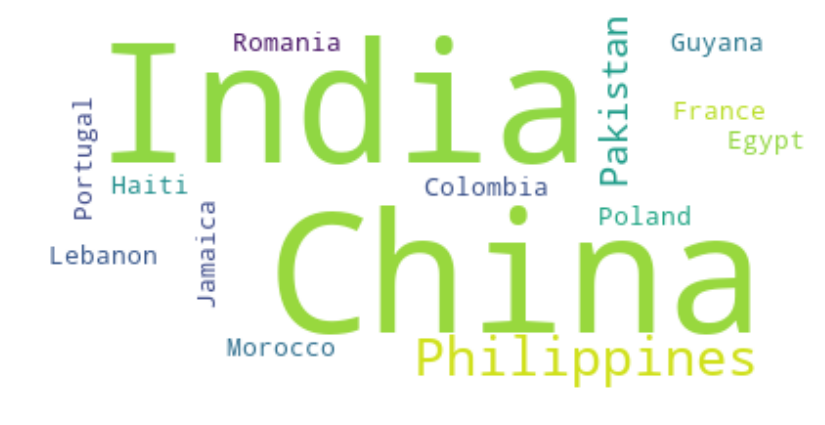

In [124]:
# display the cloud
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

According to the above word cloud, it looks like the majority of the people who immigrated came from one of 15 countries that are displayed by the word cloud. One cool visual that you could build, is perhaps using the map of Canada and a mask and superimposing the word cloud on top of the map of Canada. That would be an interesting visual to build!

###  11. Regression Plots <a id="11"></a>


> Seaborn is a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics. You can learn more about *seaborn* by following this [link](https://seaborn.pydata.org/) and more about *seaborn* regression plots by following this [link](http://seaborn.pydata.org/generated/seaborn.regplot.html).

In section*Pie Charts, Box Plots, Scatter Plots, and Bubble Plots*, we learned how to create a scatter plot and then fit a regression line. It took ~20 lines of code to create the scatter plot along with the regression fit. In this final section, we will explore *seaborn* and see how efficient it is to create regression lines and fits using this library!

Let's first install *seaborn*


In [125]:
# install seaborn
!pip install seaborn

# import library
import seaborn as sns

print('Seaborn installed and imported!')

Seaborn installed and imported!


Create a new dataframe that stores that total number of landed immigrants to Canada per year from 1980 to 2013.

In [126]:
# we can use the sum() method to get the total population per year
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

# change the years to type float (useful for regression later on)
df_tot.index = map(float,df_tot.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace = True)

# rename columns
df_tot.columns = ['year', 'total']

# view the final dataframe
df_tot.head()

year   total
0  1980.0   99137
1  1981.0  110563
2  1982.0  104271
3  1983.0   75550
4  1984.0   73417

With *seaborn*, generating a regression plot is as simple as calling the **regplot** function.

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


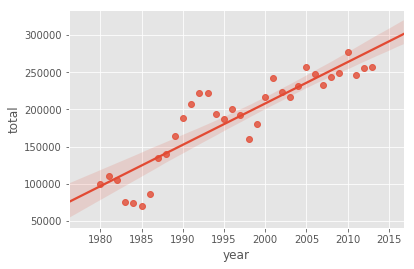

In [127]:
import seaborn as sns
ax = sns.regplot(x='year', y='total', data=df_tot)

This is not magic; it is *seaborn*! You can also customize the color of the scatter plot and regression line. Let's change the color to green.

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


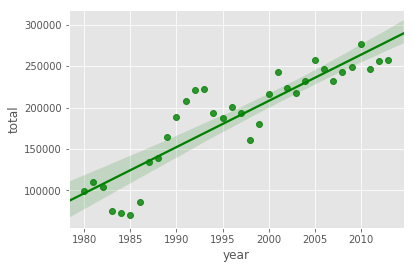

In [128]:
import seaborn as sns
ax = sns.regplot(x='year', y='total', data=df_tot, color='green')

You can always customize the marker shape, so instead of circular markers, let's use '+'.

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


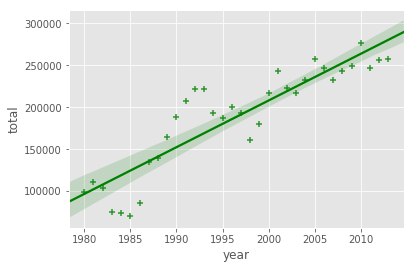

In [129]:
import seaborn as sns
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+')

Let's blow up the plot a little bit so that it is more appealing to the sight.

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


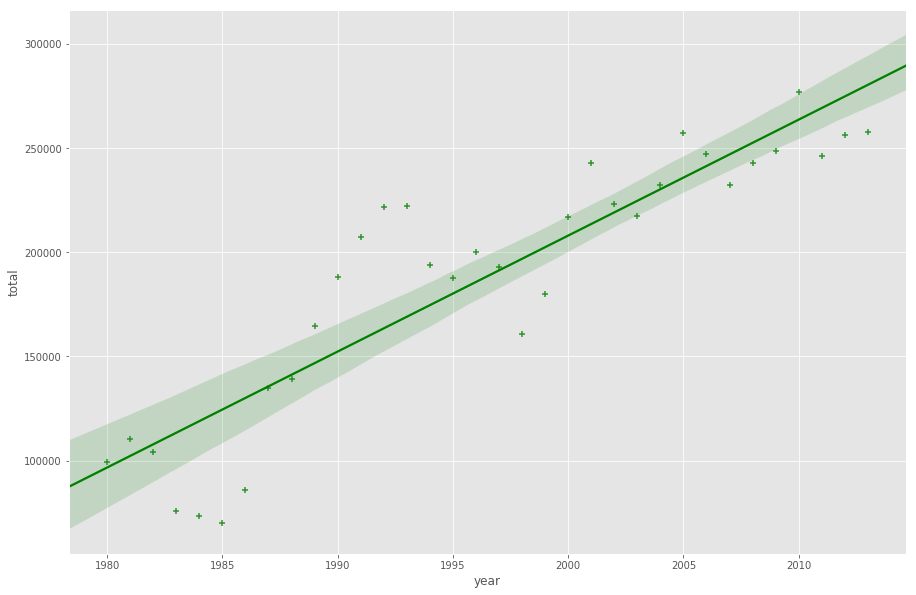

In [130]:
plt.figure(figsize=(15, 10))
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+')

And let's increase the size of markers so they match the new size of the figure, and add a title and x- and y-labels.

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Total Immigration to Canada from 1980 - 2013')

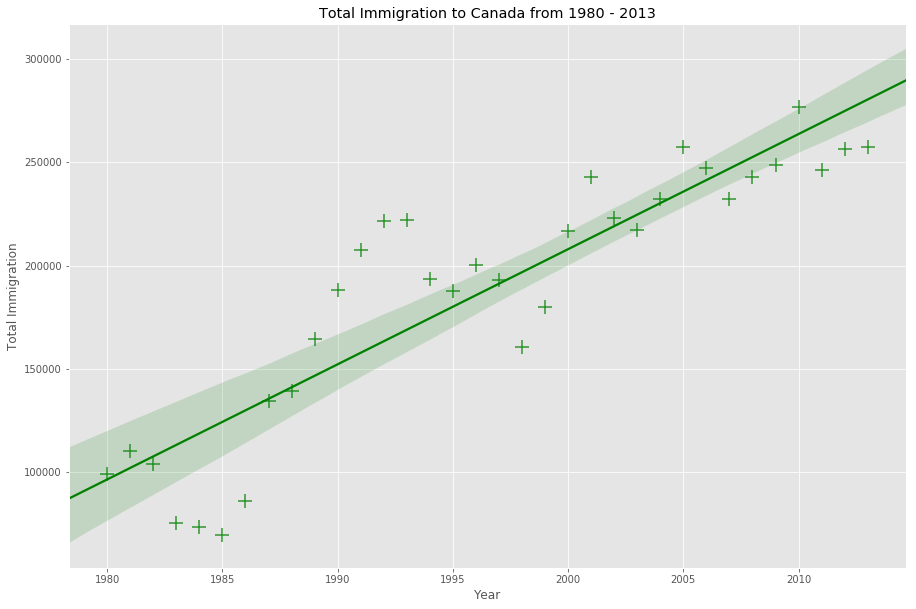

In [131]:
plt.figure(figsize=(15, 10))
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})

ax.set(xlabel='Year', ylabel='Total Immigration') # add x- and y-labels
ax.set_title('Total Immigration to Canada from 1980 - 2013') # add title

And finally increase the font size of the tickmark labels, the title, and the x- and y-labels so they don't feel left out!

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Total Immigration to Canada from 1980 - 2013')

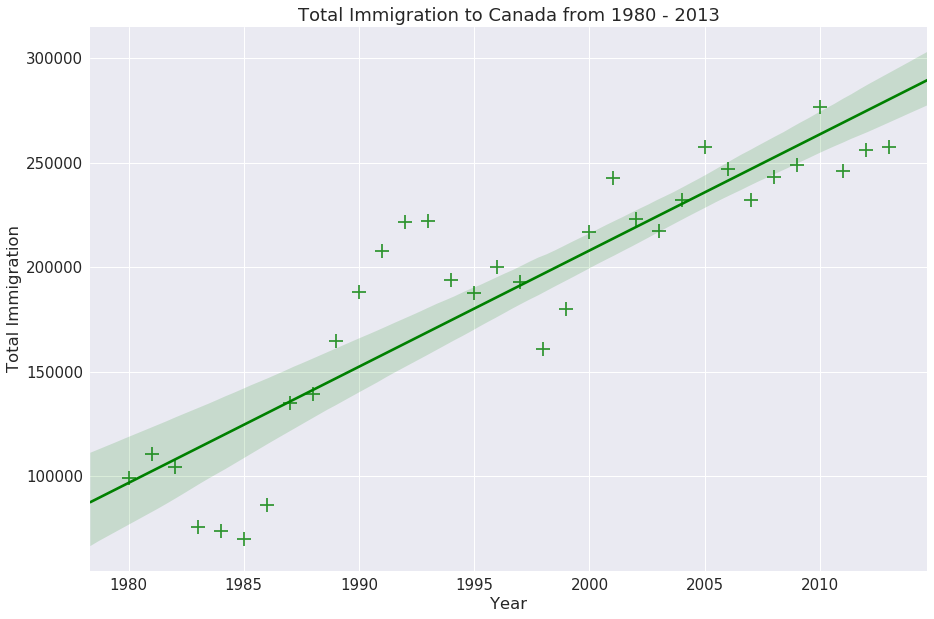

In [132]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')

Amazing! A complete scatter plot with a regression fit with 5 lines of code only. Isn't this really amazing?

If you are not a big fan of the purple background, you can easily change the style to a white plain background.

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Total Immigration to Canada from 1980 - 2013')

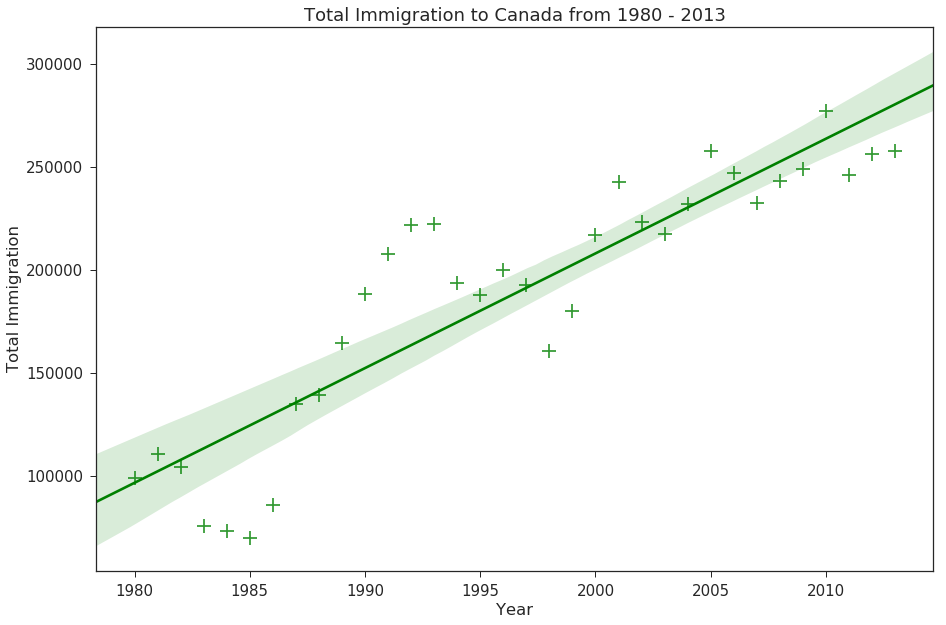

In [133]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('ticks') # change background to white background

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')

Or to a white background with gridlines.

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Total Immigration to Canada from 1980 - 2013')

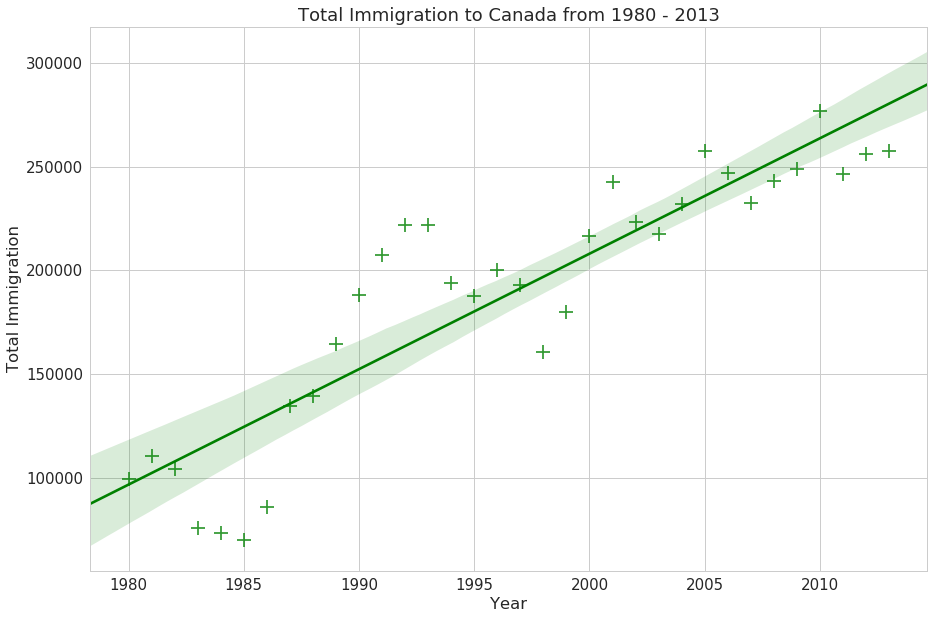

In [134]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('whitegrid')

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')

### 12. Generating Maps with Python <a id="12"></a>

## Introduction

In this lab, we will learn how to create maps for different objectives. To do that, we will part ways with Matplotlib and work with another Python visualization library, namely **Folium**. What is nice about **Folium** is that it was developed for the sole purpose of visualizing geospatial data. While other libraries are available to visualize geospatial data, such as **plotly**, they might have a cap on how many API calls you can make within a defined time frame. **Folium**, on the other hand, is completely free.

# Introduction to Folium <a id="4"></a>

Folium is a powerful Python library that helps you create several types of Leaflet maps. The fact that the Folium results are interactive makes this library very useful for dashboard building.

From the official Folium documentation page:

> Folium builds on the data wrangling strengths of the Python ecosystem and the mapping strengths of the Leaflet.js library. Manipulate your data in Python, then visualize it in on a Leaflet map via Folium.

> Folium makes it easy to visualize data that's been manipulated in Python on an interactive Leaflet map. It enables both the binding of data to a map for choropleth visualizations as well as passing Vincent/Vega visualizations as markers on the map.

> The library has a number of built-in tilesets from OpenStreetMap, Mapbox, and Stamen, and supports custom tilesets with Mapbox or Cloudmade API keys. Folium supports both GeoJSON and TopoJSON overlays, as well as the binding of data to those overlays to create choropleth maps with color-brewer color schemes.

#### Let's install **Folium**

**Folium** is not available by default. So, we first need to install it before we are able to import it.

In [135]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')

Solving environment: done

## Package Plan ##

  environment location: /home/nbuser/anaconda3_420

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    branca-0.3.1               |             py_0          25 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    typing-3.6.6               |           py35_0          44 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    altair-2.2.2               |           py35_1         462 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         604 KB

The following NEW packages will be INSTALLED:

    altair:  2.2.2-py35_1 conda-forge
    branca:  0.3.1-py_0   conda-forge
    folium:  0.5.0-py_0   conda-forge
    typing:  3.6.6-py35_0 co

Generating the world map is straigtforward in **Folium**. You simply create a **Folium** *Map* object and then you display it. What is attactive about **Folium** maps is that they are interactive, so you can zoom into any region of interest despite the initial zoom level. 

In [136]:
# define the world map
world_map = folium.Map()

# display world map
world_map

Go ahead. Try zooming in and out of the rendered map above.

You can customize this default definition of the world map by specifying the centre of your map and the intial zoom level. 

All locations on a map are defined by their respective *Latitude* and *Longitude* values. So you can create a map and pass in a center of *Latitude* and *Longitude* values of **[0, 0]**. 

For a defined center, you can also define the intial zoom level into that location when the map is rendered. **The higher the zoom level the more the map is zoomed into the center**.

Let's create a map centered around Canada and play with the zoom level to see how it affects the rendered map.

In [137]:
# define the world map centered around Canada with a low zoom level
world_map = folium.Map(location=[56.130, -106.35], zoom_start=4)

# display world map
world_map

Let's create the map again with a higher zoom level

In [138]:
# define the world map centered around Canada with a higher zoom level
world_map = folium.Map(location=[56.130, -106.35], zoom_start=8)

# display world map
world_map

As you can see, the higher the zoom level the more the map is zoomed into the given center.


### A. Stamen Toner Maps

These are high-contrast B+W (black and white) maps. They are perfect for data mashups and exploring river meanders and coastal zones. 

Let's create a Stamen Toner map of canada with a zoom level of 4.

In [139]:
# create a Stamen Toner map of the world centered around Canada
world_map = folium.Map(location=[56.130, -106.35], zoom_start=4, tiles='Stamen Toner')

# display map
world_map

Feel free to zoom in and out to see how this style compares to the default one.

### B. Stamen Terrain Maps

These are maps that feature hill shading and natural vegetation colors. They showcase advanced labeling and linework generalization of dual-carriageway roads.

Let's create a Stamen Terrain map of Canada with zoom level 4.

In [140]:
# create a Stamen Toner map of the world centered around Canada
world_map = folium.Map(location=[56.130, -106.35], zoom_start=4, tiles='Stamen Terrain')

# display map
world_map

Feel free to zoom in and out to see how this style compares to Stamen Toner and the default style.

### C. Mapbox Bright Maps

These are maps that quite similar to the default style, except that the borders are not visible with a low zoom level. Furthermore, unlike the default style where country names are displayed in each country's native language, *Mapbox Bright* style displays all country names in English.

Let's create a world map with this style.

In [141]:
# create a world map with a Mapbox Bright style.
world_map = folium.Map(tiles='Mapbox Bright')

# display the map
world_map

Zoom in and notice how the borders start showing as you zoom in, and the displayed country names are in English.

# Maps with Markers <a id="6"></a>


Let's download and import the data on police department incidents using *pandas* `read_csv()` method.

Download the dataset and read it into a *pandas* dataframe:

In [142]:
df_incidents = pd.read_csv('https://ibm.box.com/shared/static/nmcltjmocdi8sd5tk93uembzdec8zyaq.csv')

print('Dataset downloaded and read into a pandas dataframe!')

Dataset downloaded and read into a pandas dataframe!


Let's take a look at the first five items in our dataset.

In [143]:
df_incidents.head()

IncidntNum      Category                                        Descript  \
0   120058272   WEAPON LAWS                       POSS OF PROHIBITED WEAPON   
1   120058272   WEAPON LAWS  FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE   
2   141059263      WARRANTS                                  WARRANT ARREST   
3   160013662  NON-CRIMINAL                                   LOST PROPERTY   
4   160002740  NON-CRIMINAL                                   LOST PROPERTY   

  DayOfWeek                    Date   Time  PdDistrict      Resolution  \
0    Friday  01/29/2016 12:00:00 AM  11:00    SOUTHERN  ARREST, BOOKED   
1    Friday  01/29/2016 12:00:00 AM  11:00    SOUTHERN  ARREST, BOOKED   
2    Monday  04/25/2016 12:00:00 AM  14:59     BAYVIEW  ARREST, BOOKED   
3   Tuesday  01/05/2016 12:00:00 AM  23:50  TENDERLOIN            NONE   
4    Friday  01/01/2016 12:00:00 AM  00:30     MISSION            NONE   

                  Address           X          Y  \
0  800 Block of BRYANT ST -122.403405  37.775421   
1  800 Block of BRYANT ST -122.403405  37.775421   
2   KEITH ST / SHAFTER AV -122.388856  37.729981   
3  JONES ST / OFARRELL ST -122.412971  37.785788   
4    16TH ST / MISSION ST -122.419672  37.765050   

                                Location            PdId  
0   (37.775420706711, -122.403404791479)  12005827212120  
1   (37.775420706711, -122.403404791479)  12005827212168  
2  (37.7299809672996, -122.388856204292)  14105926363010  
3  (37.7857883766888, -122.412970537591)  16001366271000  
4  (37.7650501214668, -122.419671780296)  16000274071000

So each row consists of 13 features:
> 1. **IncidntNum**: Incident Number
> 2. **Category**: Category of crime or incident
> 3. **Descript**: Description of the crime or incident
> 4. **DayOfWeek**: The day of week on which the incident occurred
> 5. **Date**: The Date on which the incident occurred
> 6. **Time**: The time of day on which the incident occurred
> 7. **PdDistrict**: The police department district
> 8. **Resolution**: The resolution of the crime in terms whether the perpetrator was arrested or not
> 9. **Address**: The closest address to where the incident took place
> 10. **X**: The longitude value of the crime location 
> 11. **Y**: The latitude value of the crime location
> 12. **Location**: A tuple of the latitude and the longitude values
> 13. **PdId**: The police department ID

Let's find out how many entries there are in our dataset.

In [144]:
df_incidents.shape

(150500, 13)

So the dataframe consists of 150,500 crimes, which took place in the year 2016. In order to reduce computational cost, let's just work with the first 100 incidents in this dataset.

In [145]:
# get the first 100 crimes in the df_incidents dataframe
limit = 100
df_incidents = df_incidents.iloc[0:limit, :]

Let's confirm that our dataframe now consists only of 100 crimes.

In [146]:
df_incidents.shape

(100, 13)

Now that we reduced the data a little bit, let's visualize where these crimes took place in the city of San Francisco. We will use the default style and we will initialize the zoom level to 12. 

In [147]:
# San Francisco latitude and longitude values
latitude = 37.77
longitude = -122.42

In [148]:
# create map and display it
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# display the map of San Francisco
sanfran_map

Now let's superimpose the locations of the crimes onto the map. The way to do that in **Folium** is to create a *feature group* with its own features and style and then add it to the sanfran_map.

In [149]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
sanfran_map.add_child(incidents)

You can also add some pop-up text that would get displayed when you hover over a marker. Let's make each marker display the category of the crime when hovered over.

In [150]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add pop-up text to each marker on the map
latitudes = list(df_incidents.Y)
longitudes = list(df_incidents.X)
labels = list(df_incidents.Category)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(sanfran_map)    
    
# add incidents to map
sanfran_map.add_child(incidents)

Isn't this really cool? Now you are able to know what crime category occurred at each marker.

If you find the map to be so congested will all these markers, there are two remedies to this problem. The simpler solution is to remove these location markers and just add the text to the circle markers themselves as follows:

In [151]:
# create map and display it
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# loop through the 100 crimes and add each to the map
for lat, lng, label in zip(df_incidents.Y, df_incidents.X, df_incidents.Category):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5, # define how big you want the circle markers to be
        color='yellow',
        fill=True,
        popup=label,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(sanfran_map)

# show map
sanfran_map

The other proper remedy is to group the markers into different clusters. Each cluster is then represented by the number of crimes in each neighborhood. These clusters can be thought of as pockets of San Francisco which you can then analyze separately.

To implement this, we start off by instantiating a *MarkerCluster* object and adding all the data points in the dataframe to this object.

In [152]:
from folium import plugins

# let's start again with a clean copy of the map of San Francisco
sanfran_map = folium.Map(location = [latitude, longitude], zoom_start = 12)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(sanfran_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(df_incidents.Y, df_incidents.X, df_incidents.Category):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents)

# display map
sanfran_map

Notice how when you zoom out all the way, all markers are grouped into one cluster, *the global cluster*, of 100 markers or crimes, which is the total number of crimes in our dataframe. Once you start zooming in, the *global cluster* will start breaking up into smaller clusters. Zooming in all the way will result in individual markers.

# Choropleth Maps <a id="8"></a>

A `Choropleth` map is a thematic map in which areas are shaded or patterned in proportion to the measurement of the statistical variable being displayed on the map, such as population density or per-capita income. The choropleth map provides an easy way to visualize how a measurement varies across a geographic area or it shows the level of variability within a region. Below is a `Choropleth` map of the US depicting the population by square mile per state.

<img src = "https://ibm.box.com/shared/static/2kzaknzdf6crt3n5rx6haskg3wiaklxl.png" width = 600> 

Now, let's create our own `Choropleth` map of the world depicting immigration from various countries to Canada.

Let's first download and import our primary Canadian immigration dataset using *pandas* `read_excel()` method. Normally, before we can do that, we would need to download a module which *pandas* requires to read in excel files. This module is **xlrd**. For your convenience, we have pre-installed this module, so you would not have to worry about that. Otherwise, you would need to run the following line of code to install the **xlrd** module:
```
!conda install -c anaconda xlrd --yes
```

Download the dataset and read it into a *pandas* dataframe:

In [155]:
df_can = pd.read_excel('Canada1.xlsx',
                     sheet_name=0,
                     skiprows=0,
                     skipfooter=2)

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


Let's take a look at the first five items in our dataset.

In [156]:
df_can.head()

Type    Coverage          OdName  AREA AreaName   REG  \
0  Immigrants  Foreigners     Afghanistan   935     Asia  5501   
1  Immigrants  Foreigners         Albania   908   Europe   925   
2  Immigrants  Foreigners         Algeria   903   Africa   912   
3  Immigrants  Foreigners  American Samoa   909  Oceania   957   
4  Immigrants  Foreigners         Andorra   908   Europe   925   

           RegName  DEV             DevName  1980  ...   2004  2005  2006  \
0    Southern Asia  902  Developing regions    16  ...   2978  3436  3009   
1  Southern Europe  901   Developed regions     1  ...   1450  1223   856   
2  Northern Africa  902  Developing regions    80  ...   3616  3626  4807   
3        Polynesia  902  Developing regions     0  ...      0     0     1   
4  Southern Europe  901   Developed regions     0  ...      0     0     1   

   2007  2008  2009  2010  2011  2012  2013  
0  2652  2111  1746  1758  2203  2635  2004  
1   702   560   716   561   539   620   603  
2  3623  4005  5393  4752  4325  3774  4331  
3     0     0     0     0     0     0     0  
4     1     0     0     0     0     1     1  

[5 rows x 43 columns]

Let's find out how many entries there are in our dataset.

In [157]:
# print the dimensions of the dataframe
print(df_can.shape)

(195, 43)


Clean up data. We will make some modifications to the original dataset to make it easier to create our visualizations. Refer to *Introduction to Matplotlib and Line Plots* and *Area Plots, Histograms, and Bar Plots* notebooks for a detailed description of this preprocessing.

In [158]:
# clean up the dataset to remove unnecessary columns (eg. REG) 
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)

# let's rename the columns so that they make sense
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# for sake of consistency, let's also make all column labels of type string
df_can.columns = list(map(str, df_can.columns))

# add total column
df_can['Total'] = df_can.sum(axis=1)

# years that we will be using in this lesson - useful for plotting later on
years = list(map(str, range(1980, 2014)))
print ('data dimensions:', df_can.shape)

data dimensions: (195, 39)


Let's take a look at the first five items of our cleaned dataframe.

In [159]:
df_can.head()

Country Continent           Region             DevName  1980  1981  \
0     Afghanistan      Asia    Southern Asia  Developing regions    16    39   
1         Albania    Europe  Southern Europe   Developed regions     1     0   
2         Algeria    Africa  Northern Africa  Developing regions    80    67   
3  American Samoa   Oceania        Polynesia  Developing regions     0     1   
4         Andorra    Europe  Southern Europe   Developed regions     0     0   

   1982  1983  1984  1985  ...    2005  2006  2007  2008  2009  2010  2011  \
0    39    47    71   340  ...    3436  3009  2652  2111  1746  1758  2203   
1     0     0     0     0  ...    1223   856   702   560   716   561   539   
2    71    69    63    44  ...    3626  4807  3623  4005  5393  4752  4325   
3     0     0     0     0  ...       0     1     0     0     0     0     0   
4     0     0     0     0  ...       0     1     1     0     0     0     0   

   2012  2013  Total  
0  2635  2004  58639  
1   620   603  15699  
2  3774  4331  69439  
3     0     0      6  
4     1     1     15  

[5 rows x 39 columns]

In order to create a `Choropleth` map, we need a GeoJSON file that defines the areas/boundaries of the state, county, or country that we are interested in. In our case, since we are endeavoring to create a world map, we want a GeoJSON that defines the boundaries of all world countries. For your convenience, we will be providing you with this file, so let's go ahead and download it. Let's name it **world_countries.json**.

In [160]:
# download countries geojson file
!wget --quiet https://ibm.box.com/shared/static/cto2qv7nx6yq19logfcissyy4euo8lho.json -O world_countries.json
    
print('GeoJSON file downloaded!')

GeoJSON file downloaded!


Now that we have the GeoJSON file, let's create a world map, centered around **[0, 0]** *latitude* and *longitude* values, with an intial zoom level of 2, and using *Mapbox Bright* style.

In [161]:
world_geo = r'world_countries.json' # geojson file

# create a plain world map
world_map = folium.Map(location=[0, 0], zoom_start=2, tiles='Mapbox Bright')

And now to create a `Choropleth` map, we will use the *choropleth* method with the following main parameters:

1. geo_data, which is the GeoJSON file.
2. data, which is the dataframe containing the data.
3. columns, which represents the columns in the dataframe that will be used to create the `Choropleth` map.
4. key_on, which is the key or variable in the GeoJSON file that contains the name of the variable of interest. To determine that, you will need to open the GeoJSON file using any text editor and note the name of the key or variable that contains the name of the countries, since the countries are our variable of interest. In this case, **name** is the key in the GeoJSON file that contains the name of the countries. Note that this key is case_sensitive, so you need to pass exactly as it exists in the GeoJSON file.

In [162]:
# generate choropleth map using the total immigration of each country to Canada from 1980 to 2013
world_map.choropleth(
    geo_data=world_geo,
    data=df_can,
    columns=['Country', 'Total'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Immigration to Canada'
)

# display map
world_map

As per our `Choropleth` map legend, the darker the color of a country and the closer the color to red, the higher the number of immigrants from that country. Accordingly, the highest immigration over the course of 33 years (from 1980 to 2013) was from China, India, and the Philippines, followed by Poland, Pakistan, and interestingly, the US.

Notice how the legend is displaying a negative boundary or threshold. Let's fix that by defining our own thresholds and starting with 0 instead of -6,918!

In [163]:
world_geo = r'world_countries.json'

# create a numpy array of length 6 and has linear spacing from the minium total immigration to the maximum total immigration
threshold_scale = np.linspace(df_can['Total'].min(),
                              df_can['Total'].max(),
                              6, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum immigration

# let Folium determine the scale.
world_map = folium.Map(location=[0, 0], zoom_start=2, tiles='Mapbox Bright')
world_map.choropleth(
    geo_data=world_geo,
    data=df_can,
    columns=['Country', 'Total'],
    key_on='feature.properties.name',
    threshold_scale=threshold_scale,
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Immigration to Canada',
    reset=True
)
world_map

Much better now! Feel free to play around with the data and perhaps create `Choropleth` maps for individuals years, or perhaps decades, and see how they compare with the entire period from 1980 to 2013.

### Exercise 2 <a id="22"></a>


An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this exercise, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [165]:
import sys
!{sys.executable} -m pip install mplleaflet

  Running setup.py bdist_wheel for mplleaflet ... done
  Stored in directory: /home/nbuser/.cache/pip/wheels/bf/fd/0b/0513de62c339c4a56e2234aa42a5d06e6660a4446fdae7b796
Successfully built mplleaflet


In [206]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd
import matplotlib.dates as dates


In [207]:
def setup_data():
    
    """ reads in the data file, creates DayOfYear, Year and Temperature columns
    """
    
    # read the data
    df = pd.read_csv('fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
    
    # Convert Date column to date data type
    df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
    
    # Create DayOfYear and year columns
    df['DayOfYear'] = df['Date'].dt.strftime('%m/%d')
    df['Year'] = df['Date'].dt.year
    
    # Get rid of February 29th dates
    df = df[df.DayOfYear != '02/29']
    
    # Readd all dates.  All will have year 1900, and this doesn't matter since year was extracted
    df['DayOfYear'] = pd.to_datetime(df['DayOfYear'], format='%m/%d')
    
    # Sort by the Date column
    df = df.sort_values('Date')
    
    # Get temperature in Deg C
    df['Temperature'] = df['Data_Value']/10.0
    
    # Drop the Data_Value and Date columns
    for col in ['Data_Value', 'Date']:
        df = df.drop(col, axis=1)
    
    return df

In [208]:
def get_highs_lows_pre_2015():
    
    """
    Get the record highs and lows for years before 2015 and return a Data Frame
    """
    
    # Remove data from before 2015
    df = setup_data()
    df = df[df.Year < 2015]
    
    # Get the max and min based on DayOfYear
    result = df.groupby('DayOfYear')['Temperature'].agg(['max', 'min']).reset_index()
    
    # Create float representation of DayOfYear
    result['fds'] = result['DayOfYear'].apply(lambda x: dates.date2num(x))
    
    return result

In [209]:
def get_highs_lows_2015():
    
    """
    Get the record highs and lows that occurred in 2015
    """
    
    pre2015 = get_highs_lows_pre_2015()
    df = setup_data()
    df = df[df.Year == 2015]
        
    # Get the max and min based on DayOfYear in 2015
    df2015 = df.groupby('DayOfYear')['Temperature'].agg(['max', 'min']).rename(columns={'max': 'max2015', 'min': 'min2015'}).reset_index()
    
    # Merge the pre2015 and 2015 DataFrames
    result = pd.merge(pre2015, df2015, how='outer', left_on='DayOfYear', right_on='DayOfYear')
    
    # Determine if min or max is more extreme than pre2015
    result['min_record_in_2015'] = result['min2015'] < result['min']
    result['max_record_in_2015'] = result['max2015'] > result['max']
    
    # Remove the rows with both values False
    result = result[(result.min_record_in_2015 == True) | (result.max_record_in_2015 == True)]
    
    return result

<IPython.core.display.Javascript object>


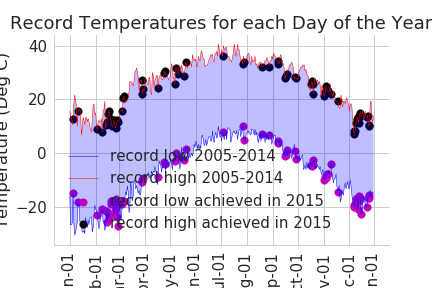

In [210]:
%matplotlib notebook

# Create new figure
plt.figure()

# Plot the record low and high from 2005-2014
pre2015 = get_highs_lows_pre_2015()
plt.plot(pre2015['fds'], pre2015['min'], color='b', lw=0.5, label='record low 2005-2014')
plt.plot(pre2015['fds'], pre2015['max'], color='r', lw=0.5, label='record high 2005-2014')

# Plot the scatter points of records broken in 2015
df2015 = get_highs_lows_2015()
plt.scatter(df2015['fds'], df2015['min'], color='m', marker='o', s=60, label='record low achieved in 2015')
plt.scatter(df2015['fds'], df2015['max'], color='k', marker='o', s=60, label='record high achieved in 2015')

ax = plt.gca()

# Set date axis format
ax.xaxis.set_major_formatter(dates.DateFormatter('%b-%d'))
ax.xaxis.set_major_locator(dates.MonthLocator())
loc, labels = plt.xticks()
plt.setp(labels, rotation=90)

# Make the x-axis go through y=0 and remove right and top spines
#ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add a plot title and legend
#plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.subplots_adjust(bottom=0.15)
plt.legend(loc='best')
plt.ylabel('Temperature (Deg C)')
plt.title('Record Temperatures for each Day of the Year')

# fill the area between the record low and highs from 2005-2014
plt.gca().fill_between(pre2015['fds'], 
                       pre2015['min'], pre2015['max'], 
                       facecolor='blue', 
                       alpha=0.25)

# Show the plot
plt.show()

In [211]:
plt.savefig('assignment2.png', format='png')

### Exercise 3 <a id="33"></a>

### Building a Custom Visualization

---

In this exercise you must choose one of the options presented below.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Ferreira, N., Fisher, D., & Konig, A. C. (2014, April). [Sample-oriented task-driven visualizations: allowing users to make better, more confident decisions.](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/Ferreira_Fisher_Sample_Oriented_Tasks.pdf) 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;In Proceedings of the SIGCHI Conference on Human Factors in Computing Systems (pp. 571-580). ACM. ([video](https://www.youtube.com/watch?v=BI7GAs-va-Q))


In this [paper](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/Ferreira_Fisher_Sample_Oriented_Tasks.pdf) the authors describe the challenges users face when trying to make judgements about probabilistic data generated through samples. As an example, they look at a bar chart of four years of data (replicated below in Figure 1). Each year has a y-axis value, which is derived from a sample of a larger dataset. For instance, the first value might be the number votes in a given district or riding for 1992, with the average being around 33,000. On top of this is plotted the 95% confidence interval for the mean (see the boxplot lectures for more information, and the yerr parameter of barcharts).


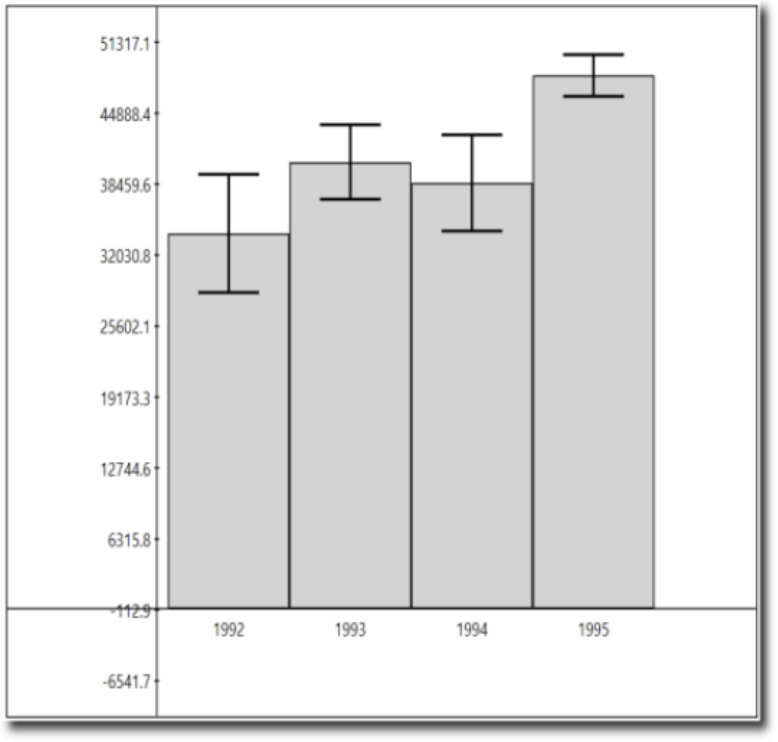

In [217]:
from IPython.display import Image
Image(filename='Assignment3Fig1.png',width=700,height=200)

A challenge that users face is that, for a given y-axis value (e.g. 42,000), it is difficult to know which x-axis values are most likely to be representative, because the confidence levels overlap and their distributions are different (the lengths of the confidence interval bars are unequal). One of the solutions the authors propose for this problem (Figure 2c) is to allow users to indicate the y-axis value of interest (e.g. 42,000) and then draw a horizontal line and color bars based on this value. So bars might be colored red if they are definitely above this value (given the confidence interval), blue if they are definitely below this value, or white if they contain this value.

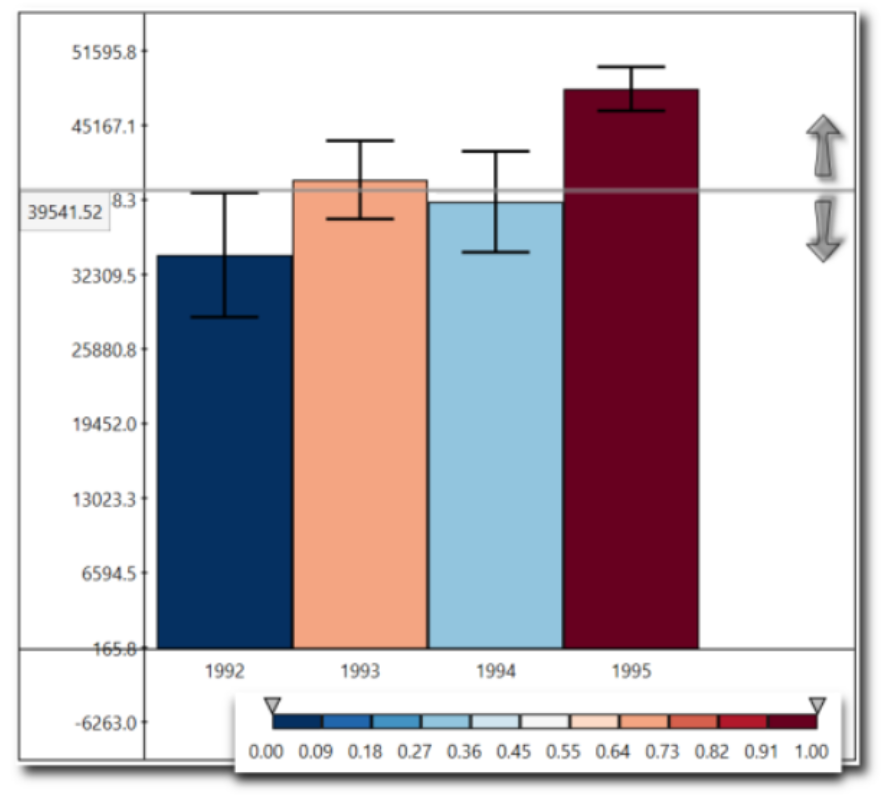

In [218]:
from IPython.display import Image
Image(filename='Assignment3Fig2c.png',width=700,height=200)

**Easiest option:** Implement the bar coloring as described above - a color scale with only three colors, (e.g. blue, white, and red). Assume the user provides the y axis value of interest as a parameter or variable.


**Harder option:** Implement the bar coloring as described in the paper, where the color of the bar is actually based on the amount of data covered (e.g. a gradient ranging from dark blue for the distribution being certainly below this y-axis, to white if the value is certainly contained, to dark red if the value is certainly not contained as the distribution is above the axis).

**Even Harder option:** Add interactivity to the above, which allows the user to click on the y axis to set the value of interest. The bar colors should change with respect to what value the user has selected.

**Hardest option:** Allow the user to interactively set a range of y values they are interested in, and recolor based on this (e.g. a y-axis band, see the paper for more details).


In [212]:
# Use the following data for this assignment:

import pandas as pd
import numpy as np

np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995]).T
df.head()

1992           1993           1994           1995
0   -8941.531897  -51896.094813  152336.932066  -69708.439062
1  127788.667612  198350.518755  192947.128056  -13289.977022
2  -71887.743011 -123518.252821  389950.263156  -30178.390991
3  -79146.060869 -129916.759685  -93006.152024   55052.181256
4  425156.114501  216119.147314  100818.575896  152883.621657

In [213]:
import math
stats = df.describe(percentiles=[0.025, 0.975]).T
stats['err'] = stats.apply(lambda row: 1.96*row['std']/math.sqrt(row['count']), axis=1)
stats

count          mean            std            min           2.5%  \
1992  3650.0  33312.107476  200630.901553 -717071.175466 -355681.148548   
1993  3650.0  41861.859541   98398.356203 -321586.023683 -153328.104574   
1994  3650.0  39493.304941  140369.925240 -450827.613097 -241403.480324   
1995  3650.0  47743.550969   69781.185469 -189865.963265  -89912.101523   

               50%          97.5%            max          err  
1992  29674.931050  426438.692036  817505.608159  6508.897970  
1993  43001.976658  235109.658331  395586.505068  3192.254314  
1994  41396.781369  305636.167342  490091.665037  4553.902287  
1995  49404.322978  183234.950476  320826.888044  2263.851744

<IPython.core.display.Javascript object>


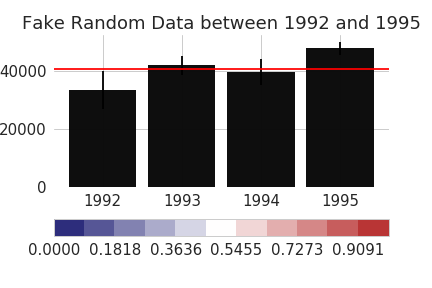

In [214]:
%matplotlib notebook

import matplotlib.pyplot as plt
from scipy.stats import norm
import matplotlib.colors as mcol
import matplotlib.cm as cm

threshold = np.mean(stats['mean'])
percentages = []

cmap = mcol.LinearSegmentedColormap.from_list("Cmap",["midnightblue", "white", "firebrick"])
cpick = cm.ScalarMappable(cmap=cmap)
cpick.set_array([])

fig = plt.figure()
ax = fig.add_subplot(111)

index = range(len(stats.index))
bars = plt.bar(index, stats['mean'], width=0.85, alpha=0.9, color="grey",
               yerr=stats['err'], error_kw={'capsize': 5, 'elinewidth': 2, 'alpha':0.7})



plt.xticks(index, stats.index)
plt.title('Fake Random Data between 1992 and 1995')
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='on', labelbottom='on')
plt.colorbar(cpick, orientation='horizontal', boundaries=np.linspace(0,1,12))

ax.axhline(y=threshold, color="red")

for spine in ax.spines.values():
    spine.set_visible(False)

In [172]:
for bar, yerr_ in zip(bars, stats['err']):
    low = bar.get_height() - yerr_
    high = bar.get_height() + yerr_
    percentage = (high-threshold)/(high-low)
    if percentage>1: percentage = 1
    if percentage<0: percentage=0
    percentages.append(percentage)
percentages

[0, 0.6972201594110068, 0.37819229306176094, 1]

In [215]:
bars = plt.bar(index, stats['mean'], width=0.85, alpha=0.9, color=cpick.to_rgba(percentages),
               yerr=stats['err'], error_kw={'capsize': 5, 'elinewidth': 2, 'alpha':0.7})

### Exercise 4 <a id="44"></a>

This exercise requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **economic activity or measures** (see below) for the region of **Ann Arbor, Michigan, United States**, or **United States** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **Ann Arbor, Michigan, United States** to Ann Arbor, USA. In that case at least one source file must be about **Ann Arbor, Michigan, United States**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about (e.g., **Ann Arbor, Michigan, United States** and **economic activity or measures**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

What do we mean by **economic activity or measures**?  For this category you might look at the inputs or outputs to the given economy, or major changes in the economy compared to other regions.

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!



In [176]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib notebook
plt.style.use('seaborn-colorblind')

In [177]:
pd.read_csv('balance.csv').head()

Variables    1986 1Q    1986 2Q    1986 3Q   \
0       D Overall Balance (A-B+C)        33.9        508      206.6   
1       A Current Account Balance      -545.4      792.7      351.1   
2                   Goods Balance   -1,044.30       -7.6     -442.9   
3                Exports Of Goods   11,497.60  12,398.50  12,404.70   
4                Imports Of Goods   12,541.90  12,406.10  12,847.60   

    1986 4Q    1987 1Q    1987 2Q    1987 3Q    1987 4Q    1988 1Q   \
0      460.1      201.7      529.8      671.8      925.2   1,057.60   
1      134.5     -659.2      261.5        110       70.7      628.9   
2     -554.2  -1,041.10       -315     -403.7     -650.1     -117.6   
3  13,132.40  12,591.40  14,832.40  16,324.90  17,454.90  17,658.80   
4  13,686.60  13,632.50  15,147.40  16,728.60     18,105  17,776.40   

     ...        2014 3Q     2014 4Q     2015 1Q     2015 2Q     2015 3Q   \
0    ...        3,405.20       110.5   -1,310.90    2,686.50       479.4   
1    ...       23,731.80   21,976.70   19,624.30   14,865.30   19,801.50   
2    ...       29,017.60   28,281.50   30,422.80   26,539.80   27,074.10   
3    ...      141,828.20  138,277.40  130,180.50  131,012.70  130,539.10   
4    ...      112,810.60  109,995.90   99,757.70  104,472.90     103,465   

     2015 4Q     2016 1Q     2016 2Q     2016 3Q    2016 4Q   
0      -354.3   -8,720.30    4,757.30    5,434.40  -3,926.70  
1   19,615.20   15,907.10   21,256.40   22,765.50  18,129.90  
2   29,864.80   25,514.70   30,332.10   30,433.20     28,093  
3  130,106.70  115,957.60  125,434.10  125,184.10    132,964  
4  100,241.90   90,442.90      95,102   94,750.90    104,871  

[5 rows x 125 columns]

In [178]:
list(pd.read_csv('balance.csv').columns.values)

[' Variables ',
 ' 1986 1Q ',
 ' 1986 2Q ',
 ' 1986 3Q ',
 ' 1986 4Q ',
 ' 1987 1Q ',
 ' 1987 2Q ',
 ' 1987 3Q ',
 ' 1987 4Q ',
 ' 1988 1Q ',
 ' 1988 2Q ',
 ' 1988 3Q ',
 ' 1988 4Q ',
 ' 1989 1Q ',
 ' 1989 2Q ',
 ' 1989 3Q ',
 ' 1989 4Q ',
 ' 1990 1Q ',
 ' 1990 2Q ',
 ' 1990 3Q ',
 ' 1990 4Q ',
 ' 1991 1Q ',
 ' 1991 2Q ',
 ' 1991 3Q ',
 ' 1991 4Q ',
 ' 1992 1Q ',
 ' 1992 2Q ',
 ' 1992 3Q ',
 ' 1992 4Q ',
 ' 1993 1Q ',
 ' 1993 2Q ',
 ' 1993 3Q ',
 ' 1993 4Q ',
 ' 1994 1Q ',
 ' 1994 2Q ',
 ' 1994 3Q ',
 ' 1994 4Q ',
 ' 1995 1Q ',
 ' 1995 2Q ',
 ' 1995 3Q ',
 ' 1995 4Q ',
 ' 1996 1Q ',
 ' 1996 2Q ',
 ' 1996 3Q ',
 ' 1996 4Q ',
 ' 1997 1Q ',
 ' 1997 2Q ',
 ' 1997 3Q ',
 ' 1997 4Q ',
 ' 1998 1Q ',
 ' 1998 2Q ',
 ' 1998 3Q ',
 ' 1998 4Q ',
 ' 1999 1Q ',
 ' 1999 2Q ',
 ' 1999 3Q ',
 ' 1999 4Q ',
 ' 2000 1Q ',
 ' 2000 2Q ',
 ' 2000 3Q ',
 ' 2000 4Q ',
 ' 2001 1Q ',
 ' 2001 2Q ',
 ' 2001 3Q ',
 ' 2001 4Q ',
 ' 2002 1Q ',
 ' 2002 2Q ',
 ' 2002 3Q ',
 ' 2002 4Q ',
 ' 2003 1Q ',
 ' 2003 2Q ',
 ' 2

In [179]:
pd.read_csv('balance.csv', index_col=' Variables ').transpose().columns.values

array([' D Overall Balance (A-B+C) ', '     A Current Account Balance ',
       '         Goods Balance ', '             Exports Of Goods ',
       '             Imports Of Goods ', '         Services Balance ',
       '             Exports Of Services ',
       '                 Maintenance And Repair Services ',
       '                 Transport ', '                 Travel ',
       '                 Insurance ',
       '                 Government Goods And Services ',
       '                 Construction ', '                 Financial ',
       '                 Telecommunications, Computer & Information ',
       '                 Charges For The Use Of Intellectual Property ',
       '                 Personal, Cultural And Recreational ',
       '                 Other Business Services ',
       '             Imports Of Services ',
       '                 Maintenance And Repair Services ',
       '                 Transport ', '                 Travel ',
       '            

In [180]:
import locale
from locale import atof

locale.setlocale(locale.LC_NUMERIC, '')


'en_US.UTF-8'

In [181]:
df_balance = pd.read_csv('balance.csv', index_col=' Variables ', thousands=',').transpose().applymap(lambda x: x.replace(',', '') if type(x)==str else x)
df_balance = df_balance[[' D Overall Balance (A-B+C) ', '         Goods Balance ', '         Services Balance ']]
df_balance.head()

Variables   D Overall Balance (A-B+C)           Goods Balance   \
 1986 1Q                           33.9                -1044.30   
 1986 2Q                            508                    -7.6   
 1986 3Q                          206.6                  -442.9   
 1986 4Q                          460.1                  -554.2   
 1987 1Q                          201.7                -1041.10   

 Variables           Services Balance   
 1986 1Q                         526.2  
 1986 2Q                           880  
 1986 3Q                         872.6  
 1986 4Q                         847.9  
 1987 1Q                         698.9

In [182]:
df_balance = df_balance.astype(float)

In [184]:
pd.read_csv('gdp.csv').head()

Variables   1975 1Q   1975 2Q   \
0   Gross Domestic Product At 2010 Market Prices   7,052.10  7,154.80   
1                     Goods Producing Industries   2,017.50  2,034.90   
2                                  Manufacturing   1,308.90  1,303.30   
3                                   Construction      508.9       533   
4                                      Utilities      130.2     131.3   

   1975 3Q   1975 4Q   1976 1Q   1976 2Q   1976 3Q   1976 4Q   1977 1Q   \
0  7,321.10  7,435.20  7,632.50  7,683.90  7,846.40  7,942.80  8,164.50   
1  2,202.60  2,260.20  2,334.50  2,336.80  2,407.30  2,387.60  2,467.50   
2  1,441.80  1,462.90  1,520.50  1,504.40  1,565.60  1,581.80  1,634.60   
3       559     591.8       605     622.4     626.6     576.6     602.9   
4     135.7     138.3     139.6     142.7     146.1     149.5     149.9   

      ...       2014 3Q    2014 4Q    2015 1Q    2015 2Q    2015 3Q   \
0     ...      96,590.10  98,579.50  97,871.30  97,981.80  98,601.30   
1     ...      24,312.70  24,186.30  23,767.30  23,618.90  23,454.80   
2     ...      18,356.50  18,257.60     17,739  17,516.80  17,304.90   
3     ...       4,589.30   4,567.90   4,670.30   4,737.70   4,778.90   
4     ...       1,327.50   1,324.10   1,322.80   1,328.40   1,334.40   

    2015 4Q    2016 1Q    2016 2Q    2016 3Q     2016 4Q   
0  99,825.30  99,708.10  99,898.40  99,803.50  102,738.20  
1     23,343  23,858.20  24,057.50  23,650.10   25,217.20  
2  17,126.30  17,654.30  17,811.70  17,584.70   19,121.20  
3   4,830.40   4,810.90   4,847.60   4,687.50    4,696.90  
4      1,351   1,357.10   1,362.10   1,344.20    1,363.40  

[5 rows x 169 columns]

In [185]:
pd.read_csv('gdp.csv', index_col=' Variables ').transpose().columns.values

array([' Gross Domestic Product At 2010 Market Prices ',
       '     Goods Producing Industries ', '         Manufacturing ',
       '         Construction ', '         Utilities ',
       '         Other Goods Industries ',
       '     Services Producing Industries ',
       '         Wholesale & Retail Trade ',
       '         Transportation & Storage ',
       '         Accommodation & Food Services ',
       '         Information & Communications ',
       '         Finance & Insurance ', '         Business Services ',
       '         Other Services Industries ',
       '     Ownership Of Dwellings ',
       '     Gross Value Added At Basic Prices ',
       '     Add: Taxes On Products '], dtype=object)

In [186]:
df_gdp = pd.read_csv('gdp.csv', index_col=' Variables ', thousands=',').transpose().applymap(lambda x: x.replace(',', '') if type(x)==str else x)
df_gdp.head()

Variables    Gross Domestic Product At 2010 Market Prices   \
 1975 1Q                                             7052.1   
 1975 2Q                                             7154.8   
 1975 3Q                                             7321.1   
 1975 4Q                                             7435.2   
 1976 1Q                                             7632.5   

 Variables        Goods Producing Industries            Manufacturing   \
 1975 1Q                               2017.5                   1308.9   
 1975 2Q                               2034.9                   1303.3   
 1975 3Q                               2202.6                   1441.8   
 1975 4Q                               2260.2                   1462.9   
 1976 1Q                               2334.5                   1520.5   

 Variables            Construction            Utilities   \
 1975 1Q                      508.9                130.2   
 1975 2Q                      533.0                131.3   
 1975 3Q                      559.0                135.7   
 1975 4Q                      591.8                138.3   
 1976 1Q                      605.0                139.6   

 Variables            Other Goods Industries   \
 1975 1Q                                 83.6   
 1975 2Q                                 85.8   
 1975 3Q                                 87.9   
 1975 4Q                                 93.1   
 1976 1Q                                 96.2   

 Variables        Services Producing Industries   \
 1975 1Q                                  4133.6   
 1975 2Q                                  4214.3   
 1975 3Q                                  4198.3   
 1975 4Q                                  4232.7   
 1976 1Q                                  4349.1   

 Variables            Wholesale & Retail Trade   \
 1975 1Q                                 1361.0   
 1975 2Q                                 1418.3   
 1975 3Q                                 1353.7   
 1975 4Q                                 1333.1   
 1976 1Q                                 1340.4   

 Variables            Transportation & Storage   \
 1975 1Q                                  543.1   
 1975 2Q                                  571.5   
 1975 3Q                                  584.5   
 1975 4Q                                  589.7   
 1976 1Q                                  643.8   

 Variables            Accommodation & Food Services   \
 1975 1Q                                       236.5   
 1975 2Q                                       239.9   
 1975 3Q                                       241.8   
 1975 4Q                                       246.9   
 1976 1Q                                       253.7   

 Variables            Information & Communications   \
 1975 1Q                                       37.9   
 1975 2Q                                       34.1   
 1975 3Q                                       35.0   
 1975 4Q                                       37.1   
 1976 1Q                                       37.9   

 Variables            Finance & Insurance            Business Services   \
 1975 1Q                             344.6                       1336.2   
 1975 2Q                             327.0                       1385.4   
 1975 3Q                             336.2                       1384.0   
 1975 4Q                             359.9                       1365.9   
 1976 1Q                             375.6                       1368.8   

 Variables            Other Services Industries   \
 1975 1Q                                   983.1   
 1975 2Q                                  1002.4   
 1975 3Q                                  1024.5   
 1975 4Q                                  1026.3   
 1976 1Q                                  1027.8   

 Variables        Ownership Of Dwellings   \
 1975 1Q                            276.9   
 1975 2Q                            281.8   
 1975 3Q                   

In [187]:
df_gdp = df_gdp[[' Gross Domestic Product At 2010 Market Prices ', '     Goods Producing Industries ', '     Services Producing Industries ']]
df_gdp = df_gdp[df_gdp.index>' 1986']
df_gdp.head()

Variables    Gross Domestic Product At 2010 Market Prices   \
 1986 1Q                                            14997.8   
 1986 2Q                                            15240.1   
 1986 3Q                                            15479.2   
 1986 4Q                                            15909.4   
 1987 1Q                                            16227.3   

 Variables        Goods Producing Industries   \
 1986 1Q                               4006.1   
 1986 2Q                               4149.5   
 1986 3Q                               4121.0   
 1986 4Q                               4207.7   
 1987 1Q                               4268.2   

 Variables        Services Producing Industries   
 1986 1Q                                  9007.6  
 1986 2Q                                  9059.1  
 1986 3Q                                  9288.4  
 1986 4Q                                  9604.3  
 1987 1Q                                  9805.5

In [188]:
all_data = df_gdp.join(df_balance)
all_data.head()

Variables    Gross Domestic Product At 2010 Market Prices   \
 1986 1Q                                            14997.8   
 1986 2Q                                            15240.1   
 1986 3Q                                            15479.2   
 1986 4Q                                            15909.4   
 1987 1Q                                            16227.3   

 Variables        Goods Producing Industries   \
 1986 1Q                               4006.1   
 1986 2Q                               4149.5   
 1986 3Q                               4121.0   
 1986 4Q                               4207.7   
 1987 1Q                               4268.2   

 Variables        Services Producing Industries    D Overall Balance (A-B+C)   \
 1986 1Q                                  9007.6                         33.9   
 1986 2Q                                  9059.1                        508.0   
 1986 3Q                                  9288.4                        206.6   
 1986 4Q                                  9604.3                        460.1   
 1987 1Q                                  9805.5                        201.7   

 Variables            Goods Balance            Services Balance   
 1986 1Q                     -1044.3                       526.2  
 1986 2Q                        -7.6                       880.0  
 1986 3Q                      -442.9                       872.6  
 1986 4Q                      -554.2                       847.9  
 1987 1Q                     -1041.1                       698.9

In [199]:
all_data.rename(columns = {' Gross Domestic Product At 2010 Market Prices ': 'GDP', 
                           '     Goods Producing Industries ': 'Goods G', 
                           '     Services Producing Industries ': 'Services G', 
                           ' D Overall Balance (A-B+C) ': 'Balance', 
                           '         Goods Balance ': 'Goods B', 
                           '         Services Balance ': 'Service B'}, inplace = True)

<IPython.core.display.Javascript object>


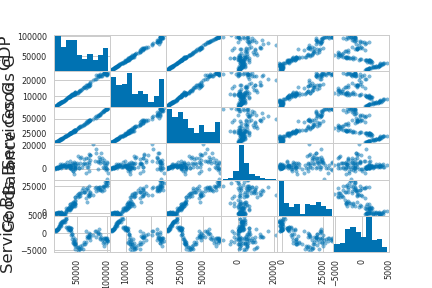

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd4b078de10>,
      dtype=object)

In [200]:
pd.tools.plotting.scatter_matrix(all_data)

In [196]:
import seaborn as sns

<IPython.core.display.Javascript object>


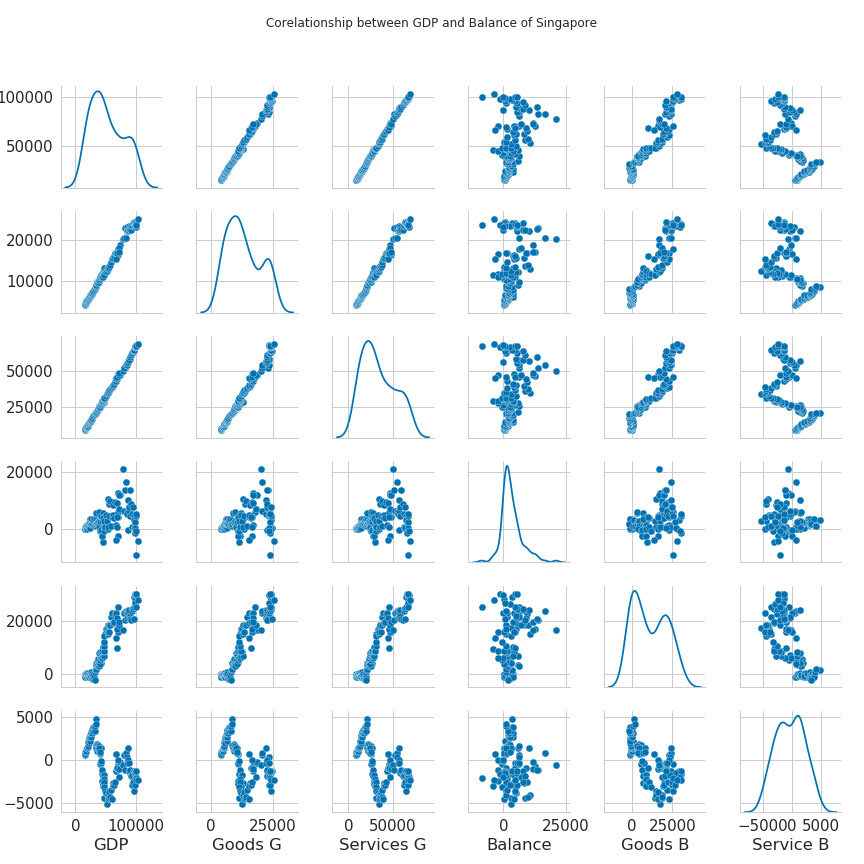

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [197]:
g = sns.pairplot(all_data, diag_kind='kde', size=2);

In [198]:
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Corelationship between GDP and Balance of Singapore')

Text(0.5,0.98,'Corelationship between GDP and Balance of Singapore')